[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/07_L2_Regularization.ipynb)

# L2 Regularization compare on a classification problem

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [74]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Cars.xls to Cars (1).xls
User uploaded file "Cars.xls" with length 153088 bytes


In [75]:
#@title
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


## Dataset description

### Car Evaluation Data Set

#### Attribute Information
*   Class Values: unacc, acc, good, vgood ->1,2,3,4
*   buying: vhigh, high, med, low -> 1,2,3,4
*   maint: vhigh, high, med, low -> 1,2,3,4
*   persons: 2,4,more -> 1,2,3
*   lug_boot: small, med, big -> 1,2,3
*   safety: low, med,high -> 1,2,3

[address](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

### 1 Data Visualization and Preprocessing

In [7]:
df = pd.read_excel('Cars.xls')
df.head()

,Bying,Maint,Doors,Persons,Lug_Boot,Saftety,Class_Val
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


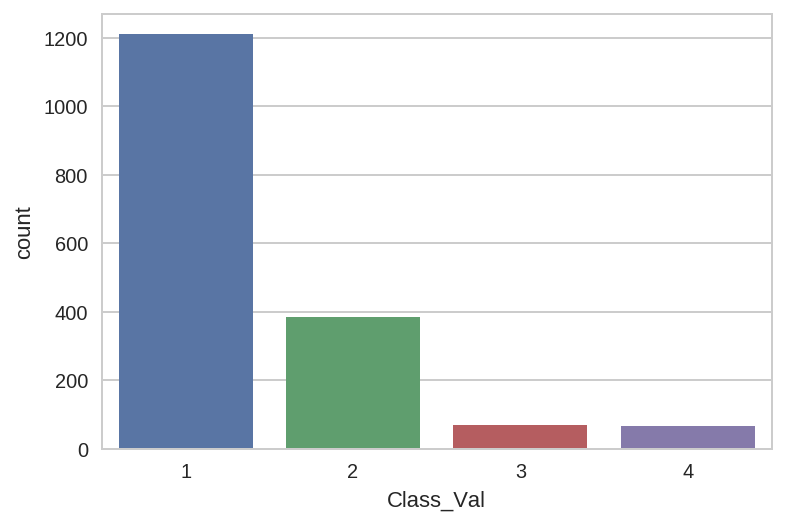

In [8]:
sns.set_style("whitegrid")
sns.countplot(df['Class_Val'])

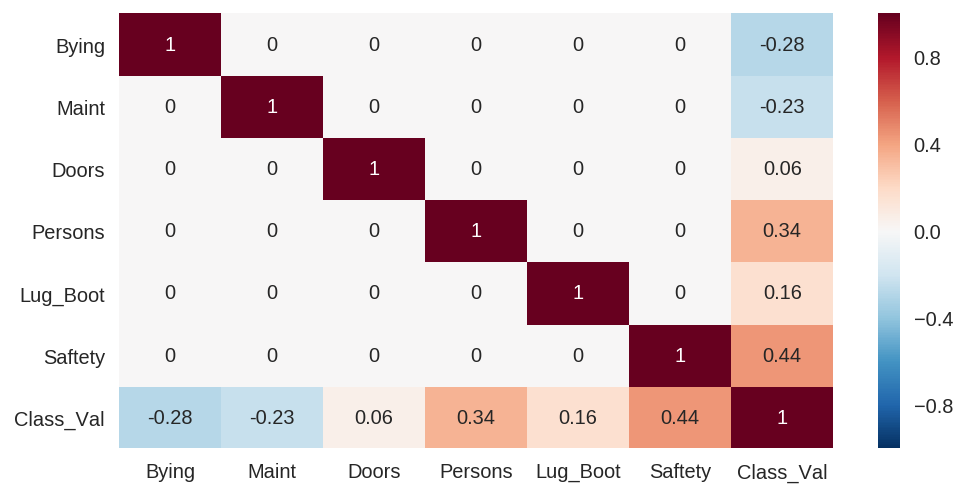

In [9]:
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot = True)

In [10]:
X = df.values[:,:-1]
y = pd.get_dummies(df['Class_Val']).values
print(X.shape,y.shape)

(1728, 6) (1728, 4)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1382, 6) (1382, 4) (346, 6) (346, 4)


## 2. Neural Network without Regularization

In [0]:
model_1 = Sequential()
model_1.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=None))
model_1.add(Dense(8, activation='relu',kernel_regularizer=None))
model_1.add(Dense(4, activation='softmax',kernel_regularizer=None))
model_1.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [82]:
model_1.history = model_1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 425us/step - loss: 1.2047 - acc: 0.4204 - val_loss: 0.9833 - val_acc: 0.6908
Epoch 2/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.8780 - acc: 0.7004 - val_loss: 0.8623 - val_acc: 0.6936
Epoch 3/500
1382/1382 [==============================] - 0s 186us/step - loss: 0.8155 - acc: 0.7019 - val_loss: 0.8092 - val_acc: 0.6936
Epoch 4/500
1382/1382 [==============================] - 0s 190us/step - loss: 0.7732 - acc: 0.7033 - val_loss: 0.7664 - val_acc: 0.6936
Epoch 5/500
1382/1382 [==============================] - 0s 184us/step - loss: 0.7425 - acc: 0.7055 - val_loss: 0.7311 - val_acc: 0.6965
Epoch 6/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.7117 - acc: 0.7091 - val_loss: 0.7010 - val_acc: 0.6936
Epoch 7/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.6831 - acc: 0.7164 - val_loss: 0.6702 - val_acc: 0

1382/1382 [==============================] - 0s 225us/step - loss: 0.5611 - acc: 0.7460 - val_loss: 0.5431 - val_acc: 0.7428
Epoch 16/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.5511 - acc: 0.7576 - val_loss: 0.5308 - val_acc: 0.7457
Epoch 17/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.5420 - acc: 0.7569 - val_loss: 0.5259 - val_acc: 0.7601
Epoch 18/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.5359 - acc: 0.7699 - val_loss: 0.5175 - val_acc: 0.7457
Epoch 19/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.5233 - acc: 0.7728 - val_loss: 0.5221 - val_acc: 0.7514
Epoch 20/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.5162 - acc: 0.7706 - val_loss: 0.4951 - val_acc: 0.7717
Epoch 21/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.5060 - acc: 0.7844 - val_loss: 0.4965 - val_acc: 0.7601
Epoch 22/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 220us/step - loss: 0.4327 - acc: 0.8220 - val_loss: 0.4095 - val_acc: 0.8295
Epoch 30/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.4238 - acc: 0.8249 - val_loss: 0.3997 - val_acc: 0.8382
Epoch 31/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4150 - acc: 0.8292 - val_loss: 0.3894 - val_acc: 0.8497
Epoch 32/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4038 - acc: 0.8350 - val_loss: 0.3803 - val_acc: 0.8526
Epoch 33/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.3947 - acc: 0.8365 - val_loss: 0.3719 - val_acc: 0.8584
Epoch 34/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.3859 - acc: 0.8437 - val_loss: 0.3623 - val_acc: 0.8555
Epoch 35/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.3775 - acc: 0.8473 - val_loss: 0.3551 - val_acc: 0.8699
Epoch 36/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 226us/step - loss: 0.3167 - acc: 0.8741 - val_loss: 0.2999 - val_acc: 0.8786
Epoch 44/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.3119 - acc: 0.8726 - val_loss: 0.3009 - val_acc: 0.8728
Epoch 45/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.3065 - acc: 0.8763 - val_loss: 0.2912 - val_acc: 0.8873
Epoch 46/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.3013 - acc: 0.8763 - val_loss: 0.2864 - val_acc: 0.8873
Epoch 47/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.2993 - acc: 0.8763 - val_loss: 0.2794 - val_acc: 0.8815
Epoch 48/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.2913 - acc: 0.8864 - val_loss: 0.2811 - val_acc: 0.8757
Epoch 49/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2906 - acc: 0.8821 - val_loss: 0.2822 - val_acc: 0.8931
Epoch 50/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 229us/step - loss: 0.2646 - acc: 0.8857 - val_loss: 0.2569 - val_acc: 0.8786
Epoch 57/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2611 - acc: 0.8907 - val_loss: 0.2554 - val_acc: 0.8902
Epoch 58/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2585 - acc: 0.8915 - val_loss: 0.2531 - val_acc: 0.8844
Epoch 59/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.2574 - acc: 0.8893 - val_loss: 0.2559 - val_acc: 0.8815
Epoch 60/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2562 - acc: 0.8886 - val_loss: 0.2485 - val_acc: 0.8844
Epoch 61/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2523 - acc: 0.8915 - val_loss: 0.2514 - val_acc: 0.8815
Epoch 62/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2510 - acc: 0.8936 - val_loss: 0.2461 - val_acc: 0.8873
Epoch 63/500
1382/1382 [=======================

Epoch 70/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2403 - acc: 0.8980 - val_loss: 0.2353 - val_acc: 0.8873
Epoch 71/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2363 - acc: 0.8973 - val_loss: 0.2342 - val_acc: 0.8902
Epoch 72/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2339 - acc: 0.8994 - val_loss: 0.2327 - val_acc: 0.8873
Epoch 73/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.2365 - acc: 0.8936 - val_loss: 0.2314 - val_acc: 0.8902
Epoch 74/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.2330 - acc: 0.8973 - val_loss: 0.2297 - val_acc: 0.8902
Epoch 75/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2305 - acc: 0.9016 - val_loss: 0.2386 - val_acc: 0.8873
Epoch 76/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.2325 - acc: 0.9030 - val_loss: 0.2285 - val_acc: 0.8873
Epoch 77/500
1382/1382 [==========

1382/1382 [==============================] - 0s 228us/step - loss: 0.2226 - acc: 0.9023 - val_loss: 0.2240 - val_acc: 0.8844
Epoch 85/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.2223 - acc: 0.9023 - val_loss: 0.2213 - val_acc: 0.8873
Epoch 86/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.2232 - acc: 0.9009 - val_loss: 0.2265 - val_acc: 0.8844
Epoch 87/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.2246 - acc: 0.9016 - val_loss: 0.2218 - val_acc: 0.8873
Epoch 88/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.2229 - acc: 0.9016 - val_loss: 0.2269 - val_acc: 0.8931
Epoch 89/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2210 - acc: 0.9016 - val_loss: 0.2196 - val_acc: 0.8902
Epoch 90/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2219 - acc: 0.9045 - val_loss: 0.2322 - val_acc: 0.8815
Epoch 91/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 218us/step - loss: 0.2130 - acc: 0.9059 - val_loss: 0.2147 - val_acc: 0.8902
Epoch 99/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.2107 - acc: 0.9088 - val_loss: 0.2160 - val_acc: 0.8902
Epoch 100/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.2098 - acc: 0.9103 - val_loss: 0.2124 - val_acc: 0.8931
Epoch 101/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.2083 - acc: 0.9067 - val_loss: 0.2159 - val_acc: 0.8902
Epoch 102/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2056 - acc: 0.9146 - val_loss: 0.2331 - val_acc: 0.8988
Epoch 103/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.2067 - acc: 0.9103 - val_loss: 0.2129 - val_acc: 0.8931
Epoch 104/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.2076 - acc: 0.9096 - val_loss: 0.2283 - val_acc: 0.8931
Epoch 105/500
1382/1382 [=================

1382/1382 [==============================] - 0s 212us/step - loss: 0.1981 - acc: 0.9153 - val_loss: 0.2114 - val_acc: 0.8988
Epoch 113/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1998 - acc: 0.9110 - val_loss: 0.2107 - val_acc: 0.9017
Epoch 114/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1969 - acc: 0.9139 - val_loss: 0.2188 - val_acc: 0.9046
Epoch 115/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.1975 - acc: 0.9146 - val_loss: 0.2083 - val_acc: 0.8873
Epoch 116/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1958 - acc: 0.9153 - val_loss: 0.2058 - val_acc: 0.8902
Epoch 117/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1954 - acc: 0.9132 - val_loss: 0.2056 - val_acc: 0.8960
Epoch 118/500
1382/1382 [==============================] - 0s 208us/step - loss: 0.1940 - acc: 0.9161 - val_loss: 0.2041 - val_acc: 0.8960
Epoch 119/500
1382/1382 [================

Epoch 127/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1850 - acc: 0.9233 - val_loss: 0.1969 - val_acc: 0.8988
Epoch 128/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1862 - acc: 0.9255 - val_loss: 0.1988 - val_acc: 0.8902
Epoch 129/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.1827 - acc: 0.9233 - val_loss: 0.1996 - val_acc: 0.8931
Epoch 130/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1900 - acc: 0.9182 - val_loss: 0.1972 - val_acc: 0.9046
Epoch 131/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.1837 - acc: 0.9219 - val_loss: 0.1954 - val_acc: 0.9046
Epoch 132/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1817 - acc: 0.9291 - val_loss: 0.1990 - val_acc: 0.9017
Epoch 133/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1804 - acc: 0.9255 - val_loss: 0.2015 - val_acc: 0.9104
Epoch 134/500
1382/1382 [==

1382/1382 [==============================] - 0s 223us/step - loss: 0.1791 - acc: 0.9313 - val_loss: 0.1913 - val_acc: 0.9133
Epoch 142/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1763 - acc: 0.9291 - val_loss: 0.1888 - val_acc: 0.8988
Epoch 143/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1750 - acc: 0.9291 - val_loss: 0.1881 - val_acc: 0.9017
Epoch 144/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1728 - acc: 0.9320 - val_loss: 0.1925 - val_acc: 0.9162
Epoch 145/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1735 - acc: 0.9255 - val_loss: 0.1882 - val_acc: 0.9104
Epoch 146/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1737 - acc: 0.9313 - val_loss: 0.2041 - val_acc: 0.9220
Epoch 147/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.1712 - acc: 0.9334 - val_loss: 0.1833 - val_acc: 0.9191
Epoch 148/500
1382/1382 [================

1382/1382 [==============================] - 0s 214us/step - loss: 0.1658 - acc: 0.9356 - val_loss: 0.1881 - val_acc: 0.9162
Epoch 156/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1641 - acc: 0.9407 - val_loss: 0.1802 - val_acc: 0.9249
Epoch 157/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1642 - acc: 0.9370 - val_loss: 0.1816 - val_acc: 0.9220
Epoch 158/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1657 - acc: 0.9356 - val_loss: 0.1856 - val_acc: 0.9191
Epoch 159/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1639 - acc: 0.9378 - val_loss: 0.1796 - val_acc: 0.9191
Epoch 160/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1593 - acc: 0.9399 - val_loss: 0.1830 - val_acc: 0.9104
Epoch 161/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1615 - acc: 0.9378 - val_loss: 0.1787 - val_acc: 0.9220
Epoch 162/500
1382/1382 [================

1382/1382 [==============================] - 0s 223us/step - loss: 0.1597 - acc: 0.9363 - val_loss: 0.1743 - val_acc: 0.9277
Epoch 170/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1554 - acc: 0.9399 - val_loss: 0.1765 - val_acc: 0.9249
Epoch 171/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1553 - acc: 0.9443 - val_loss: 0.1716 - val_acc: 0.9277
Epoch 172/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1551 - acc: 0.9465 - val_loss: 0.1701 - val_acc: 0.9220
Epoch 173/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.1557 - acc: 0.9392 - val_loss: 0.1725 - val_acc: 0.9249
Epoch 174/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1547 - acc: 0.9457 - val_loss: 0.1709 - val_acc: 0.9249
Epoch 175/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.1580 - acc: 0.9399 - val_loss: 0.1734 - val_acc: 0.9277
Epoch 176/500
1382/1382 [================

1382/1382 [==============================] - 0s 228us/step - loss: 0.1481 - acc: 0.9443 - val_loss: 0.1670 - val_acc: 0.9335
Epoch 184/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1483 - acc: 0.9443 - val_loss: 0.1693 - val_acc: 0.9277
Epoch 185/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1522 - acc: 0.9378 - val_loss: 0.1753 - val_acc: 0.9306
Epoch 186/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1518 - acc: 0.9414 - val_loss: 0.1671 - val_acc: 0.9277
Epoch 187/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.1481 - acc: 0.9421 - val_loss: 0.1682 - val_acc: 0.9335
Epoch 188/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1453 - acc: 0.9428 - val_loss: 0.1637 - val_acc: 0.9306
Epoch 189/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1466 - acc: 0.9479 - val_loss: 0.1636 - val_acc: 0.9393
Epoch 190/500
1382/1382 [================

1382/1382 [==============================] - 0s 218us/step - loss: 0.1395 - acc: 0.9479 - val_loss: 0.1662 - val_acc: 0.9393
Epoch 198/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1405 - acc: 0.9472 - val_loss: 0.1548 - val_acc: 0.9306
Epoch 199/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1409 - acc: 0.9472 - val_loss: 0.1635 - val_acc: 0.9364
Epoch 200/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.1386 - acc: 0.9472 - val_loss: 0.1582 - val_acc: 0.9393
Epoch 201/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1410 - acc: 0.9486 - val_loss: 0.1588 - val_acc: 0.9393
Epoch 202/500
1382/1382 [==============================] - 0s 208us/step - loss: 0.1420 - acc: 0.9457 - val_loss: 0.1533 - val_acc: 0.9422
Epoch 203/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1416 - acc: 0.9457 - val_loss: 0.1578 - val_acc: 0.9364
Epoch 204/500
1382/1382 [================

1382/1382 [==============================] - 0s 214us/step - loss: 0.1368 - acc: 0.9501 - val_loss: 0.1540 - val_acc: 0.9422
Epoch 212/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1350 - acc: 0.9479 - val_loss: 0.1523 - val_acc: 0.9364
Epoch 213/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1345 - acc: 0.9508 - val_loss: 0.1523 - val_acc: 0.9364
Epoch 214/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1360 - acc: 0.9472 - val_loss: 0.1547 - val_acc: 0.9451
Epoch 215/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1329 - acc: 0.9493 - val_loss: 0.1517 - val_acc: 0.9422
Epoch 216/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1331 - acc: 0.9544 - val_loss: 0.1493 - val_acc: 0.9422
Epoch 217/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.1391 - acc: 0.9443 - val_loss: 0.1491 - val_acc: 0.9364
Epoch 218/500
1382/1382 [================

1382/1382 [==============================] - 0s 211us/step - loss: 0.1299 - acc: 0.9522 - val_loss: 0.1523 - val_acc: 0.9480
Epoch 226/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.1305 - acc: 0.9465 - val_loss: 0.1546 - val_acc: 0.9393
Epoch 227/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1285 - acc: 0.9515 - val_loss: 0.1476 - val_acc: 0.9509
Epoch 228/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1281 - acc: 0.9522 - val_loss: 0.1686 - val_acc: 0.9335
Epoch 229/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1305 - acc: 0.9530 - val_loss: 0.1457 - val_acc: 0.9538
Epoch 230/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1331 - acc: 0.9522 - val_loss: 0.1602 - val_acc: 0.9364
Epoch 231/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1283 - acc: 0.9551 - val_loss: 0.1443 - val_acc: 0.9480
Epoch 232/500
1382/1382 [================

1382/1382 [==============================] - 0s 222us/step - loss: 0.1242 - acc: 0.9522 - val_loss: 0.1458 - val_acc: 0.9393
Epoch 240/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1249 - acc: 0.9493 - val_loss: 0.1486 - val_acc: 0.9451
Epoch 241/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.1217 - acc: 0.9544 - val_loss: 0.1426 - val_acc: 0.9451
Epoch 242/500
1382/1382 [==============================] - 0s 209us/step - loss: 0.1213 - acc: 0.9530 - val_loss: 0.1424 - val_acc: 0.9480
Epoch 243/500
1382/1382 [==============================] - 0s 205us/step - loss: 0.1214 - acc: 0.9508 - val_loss: 0.1461 - val_acc: 0.9480
Epoch 244/500
1382/1382 [==============================] - 0s 198us/step - loss: 0.1220 - acc: 0.9530 - val_loss: 0.1415 - val_acc: 0.9509
Epoch 245/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1198 - acc: 0.9530 - val_loss: 0.1388 - val_acc: 0.9509
Epoch 246/500
1382/1382 [================

1382/1382 [==============================] - 0s 225us/step - loss: 0.1199 - acc: 0.9559 - val_loss: 0.1418 - val_acc: 0.9480
Epoch 254/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1176 - acc: 0.9544 - val_loss: 0.1380 - val_acc: 0.9509
Epoch 255/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1166 - acc: 0.9566 - val_loss: 0.1390 - val_acc: 0.9480
Epoch 256/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1195 - acc: 0.9566 - val_loss: 0.1380 - val_acc: 0.9509
Epoch 257/500
1382/1382 [==============================] - 0s 209us/step - loss: 0.1173 - acc: 0.9486 - val_loss: 0.1460 - val_acc: 0.9480
Epoch 258/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.1187 - acc: 0.9544 - val_loss: 0.1509 - val_acc: 0.9364
Epoch 259/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1179 - acc: 0.9530 - val_loss: 0.1373 - val_acc: 0.9509
Epoch 260/500
1382/1382 [================

1382/1382 [==============================] - 0s 202us/step - loss: 0.1130 - acc: 0.9616 - val_loss: 0.1363 - val_acc: 0.9393
Epoch 268/500
1382/1382 [==============================] - 0s 204us/step - loss: 0.1144 - acc: 0.9580 - val_loss: 0.1368 - val_acc: 0.9509
Epoch 269/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1173 - acc: 0.9522 - val_loss: 0.1329 - val_acc: 0.9451
Epoch 270/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1134 - acc: 0.9537 - val_loss: 0.1348 - val_acc: 0.9480
Epoch 271/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1120 - acc: 0.9551 - val_loss: 0.1339 - val_acc: 0.9509
Epoch 272/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1105 - acc: 0.9566 - val_loss: 0.1317 - val_acc: 0.9538
Epoch 273/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1189 - acc: 0.9501 - val_loss: 0.1372 - val_acc: 0.9451
Epoch 274/500
1382/1382 [================

1382/1382 [==============================] - 0s 206us/step - loss: 0.1090 - acc: 0.9551 - val_loss: 0.1365 - val_acc: 0.9451
Epoch 282/500
1382/1382 [==============================] - 0s 208us/step - loss: 0.1092 - acc: 0.9573 - val_loss: 0.1310 - val_acc: 0.9480
Epoch 283/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1117 - acc: 0.9566 - val_loss: 0.1363 - val_acc: 0.9538
Epoch 284/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1086 - acc: 0.9544 - val_loss: 0.1312 - val_acc: 0.9480
Epoch 285/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1071 - acc: 0.9566 - val_loss: 0.1396 - val_acc: 0.9538
Epoch 286/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.1091 - acc: 0.9566 - val_loss: 0.1358 - val_acc: 0.9538
Epoch 287/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1077 - acc: 0.9530 - val_loss: 0.1322 - val_acc: 0.9480
Epoch 288/500
1382/1382 [================

1382/1382 [==============================] - 0s 213us/step - loss: 0.1049 - acc: 0.9573 - val_loss: 0.1286 - val_acc: 0.9538
Epoch 296/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.1052 - acc: 0.9544 - val_loss: 0.1307 - val_acc: 0.9480
Epoch 297/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1055 - acc: 0.9595 - val_loss: 0.1344 - val_acc: 0.9538
Epoch 298/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.1063 - acc: 0.9551 - val_loss: 0.1300 - val_acc: 0.9538
Epoch 299/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1056 - acc: 0.9559 - val_loss: 0.1385 - val_acc: 0.9480
Epoch 300/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.1030 - acc: 0.9573 - val_loss: 0.1379 - val_acc: 0.9480
Epoch 301/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.1051 - acc: 0.9551 - val_loss: 0.1351 - val_acc: 0.9480
Epoch 302/500
1382/1382 [================

1382/1382 [==============================] - 0s 231us/step - loss: 0.1015 - acc: 0.9566 - val_loss: 0.1302 - val_acc: 0.9538
Epoch 310/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1025 - acc: 0.9551 - val_loss: 0.1266 - val_acc: 0.9509
Epoch 311/500
1382/1382 [==============================] - 0s 208us/step - loss: 0.1009 - acc: 0.9595 - val_loss: 0.1339 - val_acc: 0.9509
Epoch 312/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1035 - acc: 0.9580 - val_loss: 0.1286 - val_acc: 0.9509
Epoch 313/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1001 - acc: 0.9566 - val_loss: 0.1304 - val_acc: 0.9538
Epoch 314/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1028 - acc: 0.9595 - val_loss: 0.1314 - val_acc: 0.9509
Epoch 315/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0991 - acc: 0.9609 - val_loss: 0.1398 - val_acc: 0.9451
Epoch 316/500
1382/1382 [================

Epoch 324/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.0968 - acc: 0.9602 - val_loss: 0.1332 - val_acc: 0.9480
Epoch 325/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.0979 - acc: 0.9595 - val_loss: 0.1348 - val_acc: 0.9509
Epoch 326/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0990 - acc: 0.9580 - val_loss: 0.1261 - val_acc: 0.9480
Epoch 327/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.1013 - acc: 0.9616 - val_loss: 0.1288 - val_acc: 0.9480
Epoch 328/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0985 - acc: 0.9588 - val_loss: 0.1262 - val_acc: 0.9509
Epoch 329/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0979 - acc: 0.9631 - val_loss: 0.1290 - val_acc: 0.9480
Epoch 330/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0953 - acc: 0.9631 - val_loss: 0.1285 - val_acc: 0.9480
Epoch 331/500
1382/1382 [==

Epoch 339/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.0961 - acc: 0.9645 - val_loss: 0.1263 - val_acc: 0.9451
Epoch 340/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.0963 - acc: 0.9609 - val_loss: 0.1249 - val_acc: 0.9509
Epoch 341/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.0946 - acc: 0.9624 - val_loss: 0.1254 - val_acc: 0.9480
Epoch 342/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0953 - acc: 0.9624 - val_loss: 0.1275 - val_acc: 0.9509
Epoch 343/500
1382/1382 [==============================] - 0s 205us/step - loss: 0.0930 - acc: 0.9609 - val_loss: 0.1276 - val_acc: 0.9509
Epoch 344/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.0938 - acc: 0.9616 - val_loss: 0.1268 - val_acc: 0.9538
Epoch 345/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0925 - acc: 0.9645 - val_loss: 0.1238 - val_acc: 0.9509
Epoch 346/500
1382/1382 [==

Epoch 353/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.0920 - acc: 0.9616 - val_loss: 0.1261 - val_acc: 0.9509
Epoch 354/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0920 - acc: 0.9602 - val_loss: 0.1231 - val_acc: 0.9509
Epoch 355/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0889 - acc: 0.9638 - val_loss: 0.1256 - val_acc: 0.9451
Epoch 356/500
1382/1382 [==============================] - 0s 205us/step - loss: 0.0934 - acc: 0.9631 - val_loss: 0.1246 - val_acc: 0.9538
Epoch 357/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0903 - acc: 0.9631 - val_loss: 0.1224 - val_acc: 0.9509
Epoch 358/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.0897 - acc: 0.9638 - val_loss: 0.1210 - val_acc: 0.9538
Epoch 359/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0929 - acc: 0.9631 - val_loss: 0.1207 - val_acc: 0.9509
Epoch 360/500
1382/1382 [==

1382/1382 [==============================] - 0s 222us/step - loss: 0.0900 - acc: 0.9638 - val_loss: 0.1264 - val_acc: 0.9538
Epoch 368/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0915 - acc: 0.9609 - val_loss: 0.1290 - val_acc: 0.9451
Epoch 369/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0901 - acc: 0.9609 - val_loss: 0.1247 - val_acc: 0.9509
Epoch 370/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0881 - acc: 0.9645 - val_loss: 0.1194 - val_acc: 0.9509
Epoch 371/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0874 - acc: 0.9674 - val_loss: 0.1271 - val_acc: 0.9480
Epoch 372/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0906 - acc: 0.9638 - val_loss: 0.1240 - val_acc: 0.9480
Epoch 373/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.0892 - acc: 0.9667 - val_loss: 0.1222 - val_acc: 0.9538
Epoch 374/500
1382/1382 [================

1382/1382 [==============================] - 0s 225us/step - loss: 0.0885 - acc: 0.9631 - val_loss: 0.1240 - val_acc: 0.9509
Epoch 382/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0855 - acc: 0.9653 - val_loss: 0.1304 - val_acc: 0.9509
Epoch 383/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.0863 - acc: 0.9660 - val_loss: 0.1192 - val_acc: 0.9509
Epoch 384/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.0851 - acc: 0.9667 - val_loss: 0.1271 - val_acc: 0.9509
Epoch 385/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0865 - acc: 0.9674 - val_loss: 0.1187 - val_acc: 0.9509
Epoch 386/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0852 - acc: 0.9653 - val_loss: 0.1197 - val_acc: 0.9538
Epoch 387/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0869 - acc: 0.9660 - val_loss: 0.1237 - val_acc: 0.9509
Epoch 388/500
1382/1382 [================

1382/1382 [==============================] - 0s 205us/step - loss: 0.0876 - acc: 0.9631 - val_loss: 0.1235 - val_acc: 0.9566
Epoch 396/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.0877 - acc: 0.9645 - val_loss: 0.1292 - val_acc: 0.9422
Epoch 397/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.0882 - acc: 0.9660 - val_loss: 0.1231 - val_acc: 0.9538
Epoch 398/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0835 - acc: 0.9696 - val_loss: 0.1217 - val_acc: 0.9509
Epoch 399/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.0822 - acc: 0.9682 - val_loss: 0.1202 - val_acc: 0.9451
Epoch 400/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0822 - acc: 0.9638 - val_loss: 0.1222 - val_acc: 0.9509
Epoch 401/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.0819 - acc: 0.9667 - val_loss: 0.1314 - val_acc: 0.9509
Epoch 402/500
1382/1382 [================

1382/1382 [==============================] - 0s 213us/step - loss: 0.0882 - acc: 0.9653 - val_loss: 0.1229 - val_acc: 0.9595
Epoch 410/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.0817 - acc: 0.9674 - val_loss: 0.1218 - val_acc: 0.9566
Epoch 411/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0828 - acc: 0.9703 - val_loss: 0.1203 - val_acc: 0.9509
Epoch 412/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.0833 - acc: 0.9667 - val_loss: 0.1223 - val_acc: 0.9509
Epoch 413/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.0844 - acc: 0.9638 - val_loss: 0.1165 - val_acc: 0.9509
Epoch 414/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.0820 - acc: 0.9638 - val_loss: 0.1203 - val_acc: 0.9509
Epoch 415/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.0834 - acc: 0.9682 - val_loss: 0.1423 - val_acc: 0.9538
Epoch 416/500
1382/1382 [================

1382/1382 [==============================] - 0s 214us/step - loss: 0.0831 - acc: 0.9674 - val_loss: 0.1297 - val_acc: 0.9422
Epoch 424/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.0823 - acc: 0.9645 - val_loss: 0.1168 - val_acc: 0.9538
Epoch 425/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.0783 - acc: 0.9682 - val_loss: 0.1187 - val_acc: 0.9538
Epoch 426/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0786 - acc: 0.9660 - val_loss: 0.1376 - val_acc: 0.9451
Epoch 427/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0806 - acc: 0.9660 - val_loss: 0.1207 - val_acc: 0.9509
Epoch 428/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.0793 - acc: 0.9689 - val_loss: 0.1175 - val_acc: 0.9480
Epoch 429/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.0797 - acc: 0.9667 - val_loss: 0.1219 - val_acc: 0.9538
Epoch 430/500
1382/1382 [================

1382/1382 [==============================] - 0s 220us/step - loss: 0.0793 - acc: 0.9689 - val_loss: 0.1192 - val_acc: 0.9480
Epoch 438/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0768 - acc: 0.9682 - val_loss: 0.1317 - val_acc: 0.9538
Epoch 439/500
1382/1382 [==============================] - 0s 209us/step - loss: 0.0792 - acc: 0.9703 - val_loss: 0.1247 - val_acc: 0.9538
Epoch 440/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.0773 - acc: 0.9689 - val_loss: 0.1242 - val_acc: 0.9509
Epoch 441/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.0772 - acc: 0.9689 - val_loss: 0.1188 - val_acc: 0.9509
Epoch 442/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.0763 - acc: 0.9689 - val_loss: 0.1271 - val_acc: 0.9393
Epoch 443/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.0827 - acc: 0.9660 - val_loss: 0.1200 - val_acc: 0.9480
Epoch 444/500
1382/1382 [================

1382/1382 [==============================] - 0s 205us/step - loss: 0.0750 - acc: 0.9711 - val_loss: 0.1148 - val_acc: 0.9451
Epoch 452/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0748 - acc: 0.9740 - val_loss: 0.1239 - val_acc: 0.9480
Epoch 453/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0777 - acc: 0.9667 - val_loss: 0.1164 - val_acc: 0.9538
Epoch 454/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.0777 - acc: 0.9667 - val_loss: 0.1229 - val_acc: 0.9422
Epoch 455/500
1382/1382 [==============================] - 0s 207us/step - loss: 0.0734 - acc: 0.9674 - val_loss: 0.1346 - val_acc: 0.9451
Epoch 456/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.0738 - acc: 0.9682 - val_loss: 0.1150 - val_acc: 0.9422
Epoch 457/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.0807 - acc: 0.9653 - val_loss: 0.1157 - val_acc: 0.9538
Epoch 458/500
1382/1382 [================

Epoch 466/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0787 - acc: 0.9674 - val_loss: 0.1344 - val_acc: 0.9451
Epoch 467/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.0745 - acc: 0.9703 - val_loss: 0.1282 - val_acc: 0.9509
Epoch 468/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0735 - acc: 0.9682 - val_loss: 0.1134 - val_acc: 0.9451
Epoch 469/500
1382/1382 [==============================] - 0s 208us/step - loss: 0.0755 - acc: 0.9682 - val_loss: 0.1255 - val_acc: 0.9566
Epoch 470/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.0741 - acc: 0.9689 - val_loss: 0.1128 - val_acc: 0.9480
Epoch 471/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.0748 - acc: 0.9718 - val_loss: 0.1244 - val_acc: 0.9538
Epoch 472/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.0739 - acc: 0.9740 - val_loss: 0.1149 - val_acc: 0.9566
Epoch 473/500
1382/1382 [==

1382/1382 [==============================] - 0s 215us/step - loss: 0.0712 - acc: 0.9689 - val_loss: 0.1130 - val_acc: 0.9509
Epoch 481/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.0754 - acc: 0.9667 - val_loss: 0.1115 - val_acc: 0.9538
Epoch 482/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.0719 - acc: 0.9718 - val_loss: 0.1115 - val_acc: 0.9538
Epoch 483/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.0713 - acc: 0.9740 - val_loss: 0.1123 - val_acc: 0.9480
Epoch 484/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.0722 - acc: 0.9711 - val_loss: 0.1094 - val_acc: 0.9538
Epoch 485/500
1382/1382 [==============================] - 0s 206us/step - loss: 0.0714 - acc: 0.9718 - val_loss: 0.1127 - val_acc: 0.9566
Epoch 486/500
1382/1382 [==============================] - 0s 209us/step - loss: 0.0702 - acc: 0.9703 - val_loss: 0.1189 - val_acc: 0.9566
Epoch 487/500
1382/1382 [================

Epoch 495/500
1382/1382 [==============================] - 0s 209us/step - loss: 0.0713 - acc: 0.9725 - val_loss: 0.1168 - val_acc: 0.9451
Epoch 496/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.0716 - acc: 0.9725 - val_loss: 0.1363 - val_acc: 0.9509
Epoch 497/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.0716 - acc: 0.9696 - val_loss: 0.1170 - val_acc: 0.9509
Epoch 498/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.0730 - acc: 0.9667 - val_loss: 0.1164 - val_acc: 0.9566
Epoch 499/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.0708 - acc: 0.9703 - val_loss: 0.1088 - val_acc: 0.9538
Epoch 500/500
1382/1382 [==============================] - 0s 210us/step - loss: 0.0704 - acc: 0.9696 - val_loss: 0.1253 - val_acc: 0.9566


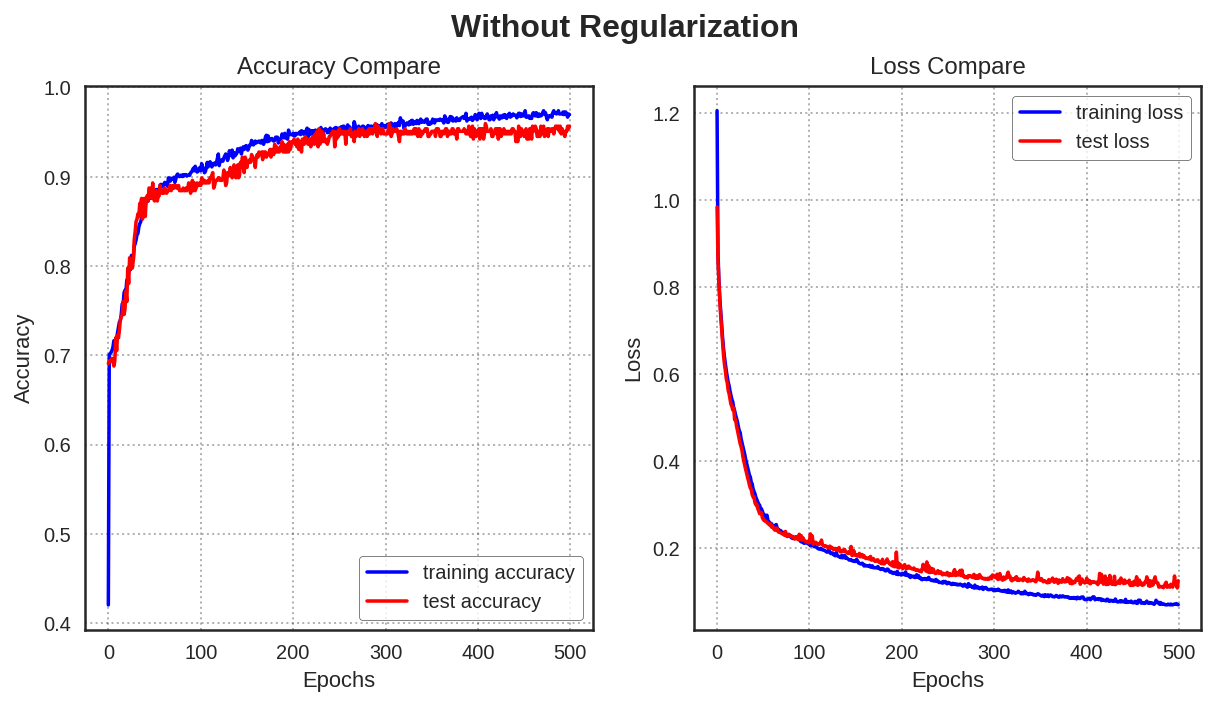

In [83]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_1.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_1.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_1.history.history['loss'],color='b',label='training loss')
ax2.plot(model_1.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Without Regularization',fontsize=16, fontweight='bold')
plt.show()

In [0]:
model_1_train_score = model_1.evaluate(X_train,y_train,verbose=0)

In [0]:
model_1_score = model_1.evaluate(X_test,y_test,verbose=0)

In [86]:
print("Train loss: ",model_1_train_score[0])
print("Test loss: ",model_1_score[0])
print("Train accuracy: %.4f%%"% (model_1_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_1_score[1]*100))


Train loss:  0.06962386089041506
Test loss:  0.12532311081455622
Train accuracy: 97.3227%
Test accuracy: 95.6647%


In [87]:
y_pred_class = model_1.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       240
          1       0.88      0.94      0.91        79
          2       0.85      1.00      0.92        17
          3       1.00      1.00      1.00        10

avg / total       0.96      0.96      0.96       346



In [0]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

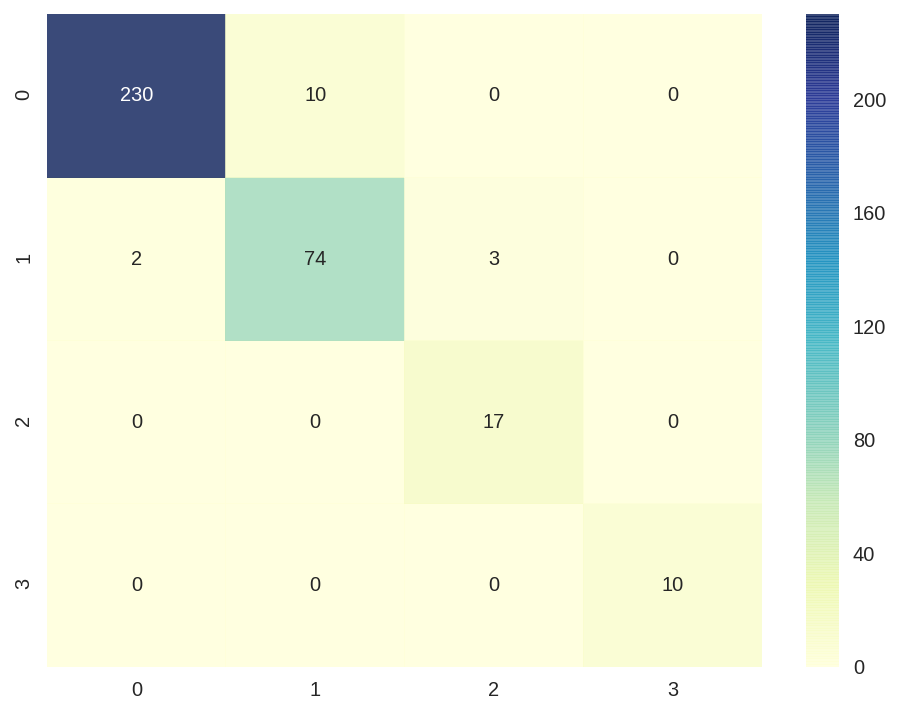

In [89]:
plot_confusion_matrix(model_1, X_test, y_test_class)

## 3. Neural Network with L2 Regularization $\lambda=0.01$

In [0]:
reg_2 = regularizers.l2(l=0.01)
model_2 = Sequential()
model_2.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_2))
model_2.add(Dense(8, activation='relu',kernel_regularizer=reg_2))
model_2.add(Dense(4, activation='softmax',kernel_regularizer=reg_2))
model_2.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [91]:
model_2.history = model_2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 440us/step - loss: 1.2421 - acc: 0.6766 - val_loss: 1.0568 - val_acc: 0.6879
Epoch 2/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.9662 - acc: 0.7019 - val_loss: 0.9397 - val_acc: 0.6936
Epoch 3/500
1382/1382 [==============================] - 0s 202us/step - loss: 0.8922 - acc: 0.7120 - val_loss: 0.8806 - val_acc: 0.7023
Epoch 4/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.8534 - acc: 0.7185 - val_loss: 0.8435 - val_acc: 0.7110
Epoch 5/500
1382/1382 [==============================] - 0s 205us/step - loss: 0.8203 - acc: 0.7207 - val_loss: 0.8220 - val_acc: 0.7052
Epoch 6/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.7996 - acc: 0.7279 - val_loss: 0.7913 - val_acc: 0.7225
Epoch 7/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.7807 - acc: 0.7344 - val_loss: 0.7704 - val_acc: 0

1382/1382 [==============================] - 0s 226us/step - loss: 0.6967 - acc: 0.7685 - val_loss: 0.6867 - val_acc: 0.7717
Epoch 15/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.6929 - acc: 0.7706 - val_loss: 0.6732 - val_acc: 0.7919
Epoch 16/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.6858 - acc: 0.7771 - val_loss: 0.6653 - val_acc: 0.7890
Epoch 17/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.6750 - acc: 0.7865 - val_loss: 0.6574 - val_acc: 0.7977
Epoch 18/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.6663 - acc: 0.7931 - val_loss: 0.6527 - val_acc: 0.8121
Epoch 19/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.6585 - acc: 0.7981 - val_loss: 0.6443 - val_acc: 0.8006
Epoch 20/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.6514 - acc: 0.7981 - val_loss: 0.6327 - val_acc: 0.8035
Epoch 21/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 225us/step - loss: 0.6092 - acc: 0.8343 - val_loss: 0.6039 - val_acc: 0.8642
Epoch 28/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.6051 - acc: 0.8372 - val_loss: 0.5870 - val_acc: 0.8237
Epoch 29/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.5973 - acc: 0.8459 - val_loss: 0.5783 - val_acc: 0.8468
Epoch 30/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.5900 - acc: 0.8466 - val_loss: 0.5719 - val_acc: 0.8439
Epoch 31/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.5849 - acc: 0.8531 - val_loss: 0.5689 - val_acc: 0.8382
Epoch 32/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.5825 - acc: 0.8502 - val_loss: 0.5641 - val_acc: 0.8613
Epoch 33/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.5763 - acc: 0.8531 - val_loss: 0.5580 - val_acc: 0.8642
Epoch 34/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 228us/step - loss: 0.5422 - acc: 0.8712 - val_loss: 0.5317 - val_acc: 0.8757
Epoch 42/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.5397 - acc: 0.8690 - val_loss: 0.5270 - val_acc: 0.8699
Epoch 43/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.5357 - acc: 0.8669 - val_loss: 0.5243 - val_acc: 0.8699
Epoch 44/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.5368 - acc: 0.8741 - val_loss: 0.5258 - val_acc: 0.8671
Epoch 45/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.5315 - acc: 0.8763 - val_loss: 0.5377 - val_acc: 0.8728
Epoch 46/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.5293 - acc: 0.8784 - val_loss: 0.5176 - val_acc: 0.8699
Epoch 47/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.5265 - acc: 0.8755 - val_loss: 0.5189 - val_acc: 0.8786
Epoch 48/500
1382/1382 [=======================

Epoch 55/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.5086 - acc: 0.8828 - val_loss: 0.5017 - val_acc: 0.8786
Epoch 56/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.5080 - acc: 0.8849 - val_loss: 0.5080 - val_acc: 0.8728
Epoch 57/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.5078 - acc: 0.8821 - val_loss: 0.5020 - val_acc: 0.8757
Epoch 58/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.5038 - acc: 0.8849 - val_loss: 0.4984 - val_acc: 0.8815
Epoch 59/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.5023 - acc: 0.8828 - val_loss: 0.4958 - val_acc: 0.8786
Epoch 60/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.5031 - acc: 0.8828 - val_loss: 0.4969 - val_acc: 0.8786
Epoch 61/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.5022 - acc: 0.8944 - val_loss: 0.4939 - val_acc: 0.8786
Epoch 62/500
1382/1382 [==========

1382/1382 [==============================] - 0s 234us/step - loss: 0.4971 - acc: 0.8849 - val_loss: 0.4882 - val_acc: 0.8786
Epoch 69/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4915 - acc: 0.8936 - val_loss: 0.4878 - val_acc: 0.8757
Epoch 70/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.4912 - acc: 0.8900 - val_loss: 0.4866 - val_acc: 0.8844
Epoch 71/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4892 - acc: 0.8893 - val_loss: 0.4860 - val_acc: 0.8844
Epoch 72/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4912 - acc: 0.8886 - val_loss: 0.5009 - val_acc: 0.8786
Epoch 73/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4879 - acc: 0.8857 - val_loss: 0.4916 - val_acc: 0.8757
Epoch 74/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4879 - acc: 0.8922 - val_loss: 0.4883 - val_acc: 0.8902
Epoch 75/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 227us/step - loss: 0.4825 - acc: 0.8922 - val_loss: 0.4801 - val_acc: 0.8844
Epoch 82/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4801 - acc: 0.8944 - val_loss: 0.4817 - val_acc: 0.8873
Epoch 83/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4824 - acc: 0.8871 - val_loss: 0.4838 - val_acc: 0.8699
Epoch 84/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.4800 - acc: 0.8878 - val_loss: 0.4797 - val_acc: 0.8815
Epoch 85/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4808 - acc: 0.8936 - val_loss: 0.4858 - val_acc: 0.8757
Epoch 86/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4778 - acc: 0.8922 - val_loss: 0.4778 - val_acc: 0.8873
Epoch 87/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4795 - acc: 0.8936 - val_loss: 0.4779 - val_acc: 0.8786
Epoch 88/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 236us/step - loss: 0.4726 - acc: 0.8929 - val_loss: 0.4793 - val_acc: 0.8699
Epoch 96/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4770 - acc: 0.8871 - val_loss: 0.4768 - val_acc: 0.8757
Epoch 97/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4727 - acc: 0.8936 - val_loss: 0.4738 - val_acc: 0.8786
Epoch 98/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4762 - acc: 0.8922 - val_loss: 0.4758 - val_acc: 0.8815
Epoch 99/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4721 - acc: 0.8915 - val_loss: 0.4749 - val_acc: 0.8873
Epoch 100/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4722 - acc: 0.8922 - val_loss: 0.4792 - val_acc: 0.8815
Epoch 101/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4731 - acc: 0.8893 - val_loss: 0.4735 - val_acc: 0.8786
Epoch 102/500
1382/1382 [====================

Epoch 109/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4694 - acc: 0.8922 - val_loss: 0.4757 - val_acc: 0.8671
Epoch 110/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.4711 - acc: 0.8907 - val_loss: 0.4730 - val_acc: 0.8873
Epoch 111/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4706 - acc: 0.8944 - val_loss: 0.4757 - val_acc: 0.8728
Epoch 112/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4753 - acc: 0.8936 - val_loss: 0.4893 - val_acc: 0.8786
Epoch 113/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.4705 - acc: 0.8936 - val_loss: 0.4705 - val_acc: 0.8844
Epoch 114/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4646 - acc: 0.8944 - val_loss: 0.4790 - val_acc: 0.8844
Epoch 115/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.4695 - acc: 0.8936 - val_loss: 0.4691 - val_acc: 0.8786
Epoch 116/500
1382/1382 [==

Epoch 123/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4649 - acc: 0.8951 - val_loss: 0.4700 - val_acc: 0.8844
Epoch 124/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4710 - acc: 0.8944 - val_loss: 0.4754 - val_acc: 0.8699
Epoch 125/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4661 - acc: 0.8951 - val_loss: 0.4680 - val_acc: 0.8844
Epoch 126/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4643 - acc: 0.8929 - val_loss: 0.4666 - val_acc: 0.8786
Epoch 127/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4638 - acc: 0.8929 - val_loss: 0.4665 - val_acc: 0.8902
Epoch 128/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4640 - acc: 0.8951 - val_loss: 0.4677 - val_acc: 0.8786
Epoch 129/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4648 - acc: 0.8936 - val_loss: 0.4659 - val_acc: 0.8815
Epoch 130/500
1382/1382 [==

1382/1382 [==============================] - 0s 225us/step - loss: 0.4665 - acc: 0.8929 - val_loss: 0.4678 - val_acc: 0.8873
Epoch 137/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4635 - acc: 0.8907 - val_loss: 0.4706 - val_acc: 0.8728
Epoch 138/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4628 - acc: 0.8907 - val_loss: 0.4672 - val_acc: 0.8902
Epoch 139/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4658 - acc: 0.9001 - val_loss: 0.4655 - val_acc: 0.8931
Epoch 140/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4673 - acc: 0.8958 - val_loss: 0.4703 - val_acc: 0.8699
Epoch 141/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4621 - acc: 0.8951 - val_loss: 0.4649 - val_acc: 0.8757
Epoch 142/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4615 - acc: 0.8929 - val_loss: 0.4654 - val_acc: 0.8873
Epoch 143/500
1382/1382 [================

1382/1382 [==============================] - 0s 215us/step - loss: 0.4596 - acc: 0.8951 - val_loss: 0.4642 - val_acc: 0.8786
Epoch 150/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4626 - acc: 0.8915 - val_loss: 0.4737 - val_acc: 0.8757
Epoch 151/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4625 - acc: 0.8958 - val_loss: 0.4695 - val_acc: 0.8757
Epoch 152/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4658 - acc: 0.8886 - val_loss: 0.4669 - val_acc: 0.8815
Epoch 153/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4578 - acc: 0.8994 - val_loss: 0.4631 - val_acc: 0.8873
Epoch 154/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4609 - acc: 0.8929 - val_loss: 0.4633 - val_acc: 0.8844
Epoch 155/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4569 - acc: 0.8987 - val_loss: 0.4678 - val_acc: 0.8873
Epoch 156/500
1382/1382 [================

Epoch 163/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.4600 - acc: 0.8958 - val_loss: 0.4650 - val_acc: 0.8844
Epoch 164/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4581 - acc: 0.8958 - val_loss: 0.4617 - val_acc: 0.8815
Epoch 165/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4600 - acc: 0.8951 - val_loss: 0.4627 - val_acc: 0.8902
Epoch 166/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4573 - acc: 0.8965 - val_loss: 0.4663 - val_acc: 0.8844
Epoch 167/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4566 - acc: 0.8944 - val_loss: 0.4614 - val_acc: 0.8786
Epoch 168/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4569 - acc: 0.8936 - val_loss: 0.4633 - val_acc: 0.8844
Epoch 169/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4626 - acc: 0.8973 - val_loss: 0.4647 - val_acc: 0.8815
Epoch 170/500
1382/1382 [==

1382/1382 [==============================] - 0s 234us/step - loss: 0.4552 - acc: 0.8965 - val_loss: 0.4626 - val_acc: 0.8873
Epoch 177/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4554 - acc: 0.8973 - val_loss: 0.4607 - val_acc: 0.8873
Epoch 178/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.4561 - acc: 0.8965 - val_loss: 0.4601 - val_acc: 0.8815
Epoch 179/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4548 - acc: 0.8951 - val_loss: 0.4621 - val_acc: 0.8815
Epoch 180/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4585 - acc: 0.8994 - val_loss: 0.4669 - val_acc: 0.8815
Epoch 181/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4533 - acc: 0.9001 - val_loss: 0.4748 - val_acc: 0.8642
Epoch 182/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4574 - acc: 0.8980 - val_loss: 0.4603 - val_acc: 0.8844
Epoch 183/500
1382/1382 [================

Epoch 190/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4548 - acc: 0.9009 - val_loss: 0.4639 - val_acc: 0.8728
Epoch 191/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4601 - acc: 0.8951 - val_loss: 0.4632 - val_acc: 0.8757
Epoch 192/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4554 - acc: 0.9001 - val_loss: 0.4595 - val_acc: 0.8902
Epoch 193/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4547 - acc: 0.8973 - val_loss: 0.4600 - val_acc: 0.8960
Epoch 194/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.4549 - acc: 0.8980 - val_loss: 0.4609 - val_acc: 0.8786
Epoch 195/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.4525 - acc: 0.8980 - val_loss: 0.4602 - val_acc: 0.8902
Epoch 196/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4539 - acc: 0.8965 - val_loss: 0.4598 - val_acc: 0.8844
Epoch 197/500
1382/1382 [==

Epoch 204/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4557 - acc: 0.8951 - val_loss: 0.4612 - val_acc: 0.8757
Epoch 205/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4555 - acc: 0.8987 - val_loss: 0.4590 - val_acc: 0.8786
Epoch 206/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4515 - acc: 0.8980 - val_loss: 0.4571 - val_acc: 0.8815
Epoch 207/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4548 - acc: 0.8987 - val_loss: 0.4582 - val_acc: 0.8815
Epoch 208/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4515 - acc: 0.9001 - val_loss: 0.4591 - val_acc: 0.8873
Epoch 209/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4532 - acc: 0.8965 - val_loss: 0.4578 - val_acc: 0.8960
Epoch 210/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4537 - acc: 0.8958 - val_loss: 0.4596 - val_acc: 0.8988
Epoch 211/500
1382/1382 [==

1382/1382 [==============================] - 0s 228us/step - loss: 0.4526 - acc: 0.9009 - val_loss: 0.4572 - val_acc: 0.8902
Epoch 218/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4514 - acc: 0.9023 - val_loss: 0.4573 - val_acc: 0.8815
Epoch 219/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.4521 - acc: 0.8965 - val_loss: 0.4626 - val_acc: 0.8873
Epoch 220/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4504 - acc: 0.8980 - val_loss: 0.4613 - val_acc: 0.8786
Epoch 221/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4509 - acc: 0.8944 - val_loss: 0.4564 - val_acc: 0.8815
Epoch 222/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4542 - acc: 0.8994 - val_loss: 0.4578 - val_acc: 0.8786
Epoch 223/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.4540 - acc: 0.8973 - val_loss: 0.4574 - val_acc: 0.8960
Epoch 224/500
1382/1382 [================

1382/1382 [==============================] - 0s 232us/step - loss: 0.4503 - acc: 0.8980 - val_loss: 0.4608 - val_acc: 0.8815
Epoch 232/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4515 - acc: 0.8958 - val_loss: 0.4565 - val_acc: 0.8815
Epoch 233/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4511 - acc: 0.8980 - val_loss: 0.4576 - val_acc: 0.8844
Epoch 234/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.4500 - acc: 0.8987 - val_loss: 0.4581 - val_acc: 0.8902
Epoch 235/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4505 - acc: 0.9009 - val_loss: 0.4616 - val_acc: 0.8815
Epoch 236/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4557 - acc: 0.8929 - val_loss: 0.4627 - val_acc: 0.8873
Epoch 237/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4493 - acc: 0.9023 - val_loss: 0.4595 - val_acc: 0.8757
Epoch 238/500
1382/1382 [================

1382/1382 [==============================] - 0s 239us/step - loss: 0.4535 - acc: 0.8980 - val_loss: 0.4597 - val_acc: 0.8873
Epoch 245/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4496 - acc: 0.9016 - val_loss: 0.4568 - val_acc: 0.8931
Epoch 246/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.4520 - acc: 0.8987 - val_loss: 0.4565 - val_acc: 0.8844
Epoch 247/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4522 - acc: 0.9001 - val_loss: 0.4576 - val_acc: 0.8873
Epoch 248/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4508 - acc: 0.9016 - val_loss: 0.4553 - val_acc: 0.8931
Epoch 249/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4502 - acc: 0.8994 - val_loss: 0.4558 - val_acc: 0.8786
Epoch 250/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.4480 - acc: 0.9023 - val_loss: 0.4549 - val_acc: 0.8815
Epoch 251/500
1382/1382 [================

Epoch 258/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4561 - acc: 0.8951 - val_loss: 0.4562 - val_acc: 0.8960
Epoch 259/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4496 - acc: 0.8980 - val_loss: 0.4578 - val_acc: 0.8902
Epoch 260/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4512 - acc: 0.8965 - val_loss: 0.4614 - val_acc: 0.8757
Epoch 261/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4508 - acc: 0.9016 - val_loss: 0.4559 - val_acc: 0.8844
Epoch 262/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4496 - acc: 0.8994 - val_loss: 0.4572 - val_acc: 0.8757
Epoch 263/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4477 - acc: 0.9016 - val_loss: 0.4655 - val_acc: 0.8931
Epoch 264/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4508 - acc: 0.8965 - val_loss: 0.4549 - val_acc: 0.8815
Epoch 265/500
1382/1382 [==

1382/1382 [==============================] - 0s 227us/step - loss: 0.4516 - acc: 0.8951 - val_loss: 0.4550 - val_acc: 0.8873
Epoch 272/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.4484 - acc: 0.9016 - val_loss: 0.4662 - val_acc: 0.8728
Epoch 273/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4522 - acc: 0.8958 - val_loss: 0.4554 - val_acc: 0.8873
Epoch 274/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4473 - acc: 0.9045 - val_loss: 0.4553 - val_acc: 0.8844
Epoch 275/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.4479 - acc: 0.8980 - val_loss: 0.4558 - val_acc: 0.8844
Epoch 276/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4506 - acc: 0.9038 - val_loss: 0.4561 - val_acc: 0.8844
Epoch 277/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4482 - acc: 0.8994 - val_loss: 0.4552 - val_acc: 0.8931
Epoch 278/500
1382/1382 [================

Epoch 285/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4470 - acc: 0.9030 - val_loss: 0.4552 - val_acc: 0.8786
Epoch 286/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4475 - acc: 0.9001 - val_loss: 0.4557 - val_acc: 0.8873
Epoch 287/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4505 - acc: 0.8987 - val_loss: 0.4547 - val_acc: 0.8873
Epoch 288/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4461 - acc: 0.9023 - val_loss: 0.4560 - val_acc: 0.8786
Epoch 289/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4486 - acc: 0.8929 - val_loss: 0.4534 - val_acc: 0.8844
Epoch 290/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4501 - acc: 0.9009 - val_loss: 0.4541 - val_acc: 0.8844
Epoch 291/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4469 - acc: 0.8994 - val_loss: 0.4549 - val_acc: 0.8902
Epoch 292/500
1382/1382 [==

1382/1382 [==============================] - 0s 230us/step - loss: 0.4478 - acc: 0.8994 - val_loss: 0.4576 - val_acc: 0.8844
Epoch 299/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4461 - acc: 0.9016 - val_loss: 0.4551 - val_acc: 0.8931
Epoch 300/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4461 - acc: 0.8980 - val_loss: 0.4553 - val_acc: 0.8757
Epoch 301/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4484 - acc: 0.8965 - val_loss: 0.4578 - val_acc: 0.8873
Epoch 302/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4473 - acc: 0.9001 - val_loss: 0.4530 - val_acc: 0.8844
Epoch 303/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4455 - acc: 0.9030 - val_loss: 0.4569 - val_acc: 0.8728
Epoch 304/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4508 - acc: 0.8965 - val_loss: 0.4528 - val_acc: 0.8815
Epoch 305/500
1382/1382 [================

Epoch 312/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4458 - acc: 0.9009 - val_loss: 0.4548 - val_acc: 0.8902
Epoch 313/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4458 - acc: 0.9009 - val_loss: 0.4532 - val_acc: 0.8815
Epoch 314/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4449 - acc: 0.8987 - val_loss: 0.4604 - val_acc: 0.8844
Epoch 315/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4462 - acc: 0.9016 - val_loss: 0.4529 - val_acc: 0.8902
Epoch 316/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4458 - acc: 0.9009 - val_loss: 0.4541 - val_acc: 0.8786
Epoch 317/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4482 - acc: 0.8987 - val_loss: 0.4553 - val_acc: 0.8786
Epoch 318/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4452 - acc: 0.8987 - val_loss: 0.4547 - val_acc: 0.8931
Epoch 319/500
1382/1382 [==

1382/1382 [==============================] - 0s 227us/step - loss: 0.4486 - acc: 0.8987 - val_loss: 0.4549 - val_acc: 0.8786
Epoch 326/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4488 - acc: 0.9001 - val_loss: 0.4542 - val_acc: 0.8786
Epoch 327/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4442 - acc: 0.9009 - val_loss: 0.4567 - val_acc: 0.8844
Epoch 328/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4464 - acc: 0.8980 - val_loss: 0.4562 - val_acc: 0.8902
Epoch 329/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4472 - acc: 0.8987 - val_loss: 0.4546 - val_acc: 0.8815
Epoch 330/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4454 - acc: 0.8987 - val_loss: 0.4551 - val_acc: 0.8786
Epoch 331/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4482 - acc: 0.9023 - val_loss: 0.4543 - val_acc: 0.8815
Epoch 332/500
1382/1382 [================

1382/1382 [==============================] - 0s 227us/step - loss: 0.4442 - acc: 0.9009 - val_loss: 0.4586 - val_acc: 0.8757
Epoch 339/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.4432 - acc: 0.9009 - val_loss: 0.4622 - val_acc: 0.8786
Epoch 340/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4450 - acc: 0.8994 - val_loss: 0.4546 - val_acc: 0.8960
Epoch 341/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4446 - acc: 0.9001 - val_loss: 0.4558 - val_acc: 0.8786
Epoch 342/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.4457 - acc: 0.8994 - val_loss: 0.4633 - val_acc: 0.8960
Epoch 343/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4445 - acc: 0.9023 - val_loss: 0.4542 - val_acc: 0.8988
Epoch 344/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.4441 - acc: 0.9023 - val_loss: 0.4539 - val_acc: 0.8815
Epoch 345/500
1382/1382 [================

1382/1382 [==============================] - 0s 226us/step - loss: 0.4483 - acc: 0.9016 - val_loss: 0.4580 - val_acc: 0.8757
Epoch 352/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4451 - acc: 0.9009 - val_loss: 0.4635 - val_acc: 0.8902
Epoch 353/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4464 - acc: 0.9052 - val_loss: 0.4531 - val_acc: 0.8757
Epoch 354/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4457 - acc: 0.9023 - val_loss: 0.4542 - val_acc: 0.8815
Epoch 355/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4487 - acc: 0.8965 - val_loss: 0.4602 - val_acc: 0.8786
Epoch 356/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4456 - acc: 0.8987 - val_loss: 0.4538 - val_acc: 0.8815
Epoch 357/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4432 - acc: 0.9038 - val_loss: 0.4536 - val_acc: 0.8902
Epoch 358/500
1382/1382 [================

1382/1382 [==============================] - 0s 224us/step - loss: 0.4465 - acc: 0.9038 - val_loss: 0.4528 - val_acc: 0.8815
Epoch 365/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4438 - acc: 0.8994 - val_loss: 0.4571 - val_acc: 0.8728
Epoch 366/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4444 - acc: 0.9023 - val_loss: 0.4539 - val_acc: 0.8873
Epoch 367/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.4423 - acc: 0.9038 - val_loss: 0.4545 - val_acc: 0.8873
Epoch 368/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4431 - acc: 0.9052 - val_loss: 0.4537 - val_acc: 0.8815
Epoch 369/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4440 - acc: 0.9009 - val_loss: 0.4525 - val_acc: 0.8844
Epoch 370/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.4441 - acc: 0.9052 - val_loss: 0.4543 - val_acc: 0.8844
Epoch 371/500
1382/1382 [================

Epoch 378/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4435 - acc: 0.9009 - val_loss: 0.4553 - val_acc: 0.8931
Epoch 379/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4437 - acc: 0.9030 - val_loss: 0.4522 - val_acc: 0.8786
Epoch 380/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4418 - acc: 0.9052 - val_loss: 0.4517 - val_acc: 0.8844
Epoch 381/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4415 - acc: 0.9030 - val_loss: 0.4526 - val_acc: 0.8815
Epoch 382/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4436 - acc: 0.9016 - val_loss: 0.4604 - val_acc: 0.8902
Epoch 383/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4450 - acc: 0.9038 - val_loss: 0.4523 - val_acc: 0.8902
Epoch 384/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4424 - acc: 0.8987 - val_loss: 0.4594 - val_acc: 0.8757
Epoch 385/500
1382/1382 [==

1382/1382 [==============================] - 0s 220us/step - loss: 0.4426 - acc: 0.9016 - val_loss: 0.4529 - val_acc: 0.8844
Epoch 392/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4415 - acc: 0.9030 - val_loss: 0.4511 - val_acc: 0.8873
Epoch 393/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4422 - acc: 0.9030 - val_loss: 0.4532 - val_acc: 0.8873
Epoch 394/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4431 - acc: 0.9081 - val_loss: 0.4519 - val_acc: 0.8786
Epoch 395/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.4414 - acc: 0.9045 - val_loss: 0.4513 - val_acc: 0.8902
Epoch 396/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4436 - acc: 0.8987 - val_loss: 0.4538 - val_acc: 0.8931
Epoch 397/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4437 - acc: 0.9001 - val_loss: 0.4521 - val_acc: 0.8873
Epoch 398/500
1382/1382 [================

1382/1382 [==============================] - 0s 223us/step - loss: 0.4426 - acc: 0.9030 - val_loss: 0.4532 - val_acc: 0.8786
Epoch 405/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4416 - acc: 0.9023 - val_loss: 0.4559 - val_acc: 0.8786
Epoch 406/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4412 - acc: 0.9038 - val_loss: 0.4515 - val_acc: 0.8728
Epoch 407/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4445 - acc: 0.8987 - val_loss: 0.4587 - val_acc: 0.8873
Epoch 408/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4403 - acc: 0.9059 - val_loss: 0.4525 - val_acc: 0.8728
Epoch 409/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.4412 - acc: 0.9038 - val_loss: 0.4536 - val_acc: 0.8844
Epoch 410/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.4414 - acc: 0.9045 - val_loss: 0.4512 - val_acc: 0.8728
Epoch 411/500
1382/1382 [================

1382/1382 [==============================] - 0s 221us/step - loss: 0.4427 - acc: 0.9009 - val_loss: 0.4506 - val_acc: 0.8844
Epoch 418/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4406 - acc: 0.9016 - val_loss: 0.4520 - val_acc: 0.8699
Epoch 419/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4445 - acc: 0.8965 - val_loss: 0.4535 - val_acc: 0.8699
Epoch 420/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4408 - acc: 0.9016 - val_loss: 0.4520 - val_acc: 0.8786
Epoch 421/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.4409 - acc: 0.9030 - val_loss: 0.4521 - val_acc: 0.8844
Epoch 422/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.4411 - acc: 0.9016 - val_loss: 0.4523 - val_acc: 0.8815
Epoch 423/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4440 - acc: 0.9001 - val_loss: 0.4521 - val_acc: 0.8815
Epoch 424/500
1382/1382 [================

1382/1382 [==============================] - 0s 224us/step - loss: 0.4426 - acc: 0.9045 - val_loss: 0.4533 - val_acc: 0.8844
Epoch 432/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4396 - acc: 0.9030 - val_loss: 0.4518 - val_acc: 0.8873
Epoch 433/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4410 - acc: 0.9001 - val_loss: 0.4507 - val_acc: 0.8815
Epoch 434/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4421 - acc: 0.9009 - val_loss: 0.4517 - val_acc: 0.8728
Epoch 435/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4442 - acc: 0.9052 - val_loss: 0.4540 - val_acc: 0.8757
Epoch 436/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4408 - acc: 0.8987 - val_loss: 0.4524 - val_acc: 0.8815
Epoch 437/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4408 - acc: 0.9030 - val_loss: 0.4521 - val_acc: 0.8757
Epoch 438/500
1382/1382 [================

1382/1382 [==============================] - 0s 236us/step - loss: 0.4417 - acc: 0.9052 - val_loss: 0.4528 - val_acc: 0.8873
Epoch 445/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4406 - acc: 0.9016 - val_loss: 0.4534 - val_acc: 0.8873
Epoch 446/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.4403 - acc: 0.9009 - val_loss: 0.4525 - val_acc: 0.8786
Epoch 447/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.4420 - acc: 0.9009 - val_loss: 0.4527 - val_acc: 0.8902
Epoch 448/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4415 - acc: 0.9030 - val_loss: 0.4518 - val_acc: 0.8757
Epoch 449/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4427 - acc: 0.9009 - val_loss: 0.4695 - val_acc: 0.8873
Epoch 450/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4418 - acc: 0.9016 - val_loss: 0.4501 - val_acc: 0.8844
Epoch 451/500
1382/1382 [================

1382/1382 [==============================] - 0s 227us/step - loss: 0.4419 - acc: 0.9009 - val_loss: 0.4536 - val_acc: 0.8931
Epoch 459/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4404 - acc: 0.9074 - val_loss: 0.4526 - val_acc: 0.8786
Epoch 460/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4438 - acc: 0.8980 - val_loss: 0.4539 - val_acc: 0.8786
Epoch 461/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4393 - acc: 0.9001 - val_loss: 0.4582 - val_acc: 0.8844
Epoch 462/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4385 - acc: 0.9016 - val_loss: 0.4551 - val_acc: 0.8786
Epoch 463/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4437 - acc: 0.9001 - val_loss: 0.4580 - val_acc: 0.8757
Epoch 464/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.4427 - acc: 0.9038 - val_loss: 0.4523 - val_acc: 0.8757
Epoch 465/500
1382/1382 [================

1382/1382 [==============================] - 0s 232us/step - loss: 0.4460 - acc: 0.9030 - val_loss: 0.4533 - val_acc: 0.8844
Epoch 472/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.4426 - acc: 0.9016 - val_loss: 0.4562 - val_acc: 0.8728
Epoch 473/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.4483 - acc: 0.9023 - val_loss: 0.4521 - val_acc: 0.8815
Epoch 474/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4399 - acc: 0.9052 - val_loss: 0.4568 - val_acc: 0.8728
Epoch 475/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4413 - acc: 0.9030 - val_loss: 0.4519 - val_acc: 0.8786
Epoch 476/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.4382 - acc: 0.9016 - val_loss: 0.4632 - val_acc: 0.8902
Epoch 477/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.4415 - acc: 0.8973 - val_loss: 0.4536 - val_acc: 0.8786
Epoch 478/500
1382/1382 [================

1382/1382 [==============================] - 0s 228us/step - loss: 0.4404 - acc: 0.9001 - val_loss: 0.4509 - val_acc: 0.8786
Epoch 485/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4496 - acc: 0.8936 - val_loss: 0.4624 - val_acc: 0.8931
Epoch 486/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.4390 - acc: 0.9038 - val_loss: 0.4522 - val_acc: 0.8815
Epoch 487/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.4393 - acc: 0.9016 - val_loss: 0.4534 - val_acc: 0.8786
Epoch 488/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.4420 - acc: 0.9023 - val_loss: 0.4596 - val_acc: 0.8728
Epoch 489/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.4400 - acc: 0.9045 - val_loss: 0.4535 - val_acc: 0.8728
Epoch 490/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.4390 - acc: 0.9045 - val_loss: 0.4535 - val_acc: 0.8902
Epoch 491/500
1382/1382 [================

1382/1382 [==============================] - 0s 228us/step - loss: 0.4378 - acc: 0.9030 - val_loss: 0.4509 - val_acc: 0.8786
Epoch 499/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4384 - acc: 0.9059 - val_loss: 0.4509 - val_acc: 0.8844
Epoch 500/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.4445 - acc: 0.8980 - val_loss: 0.4555 - val_acc: 0.8786


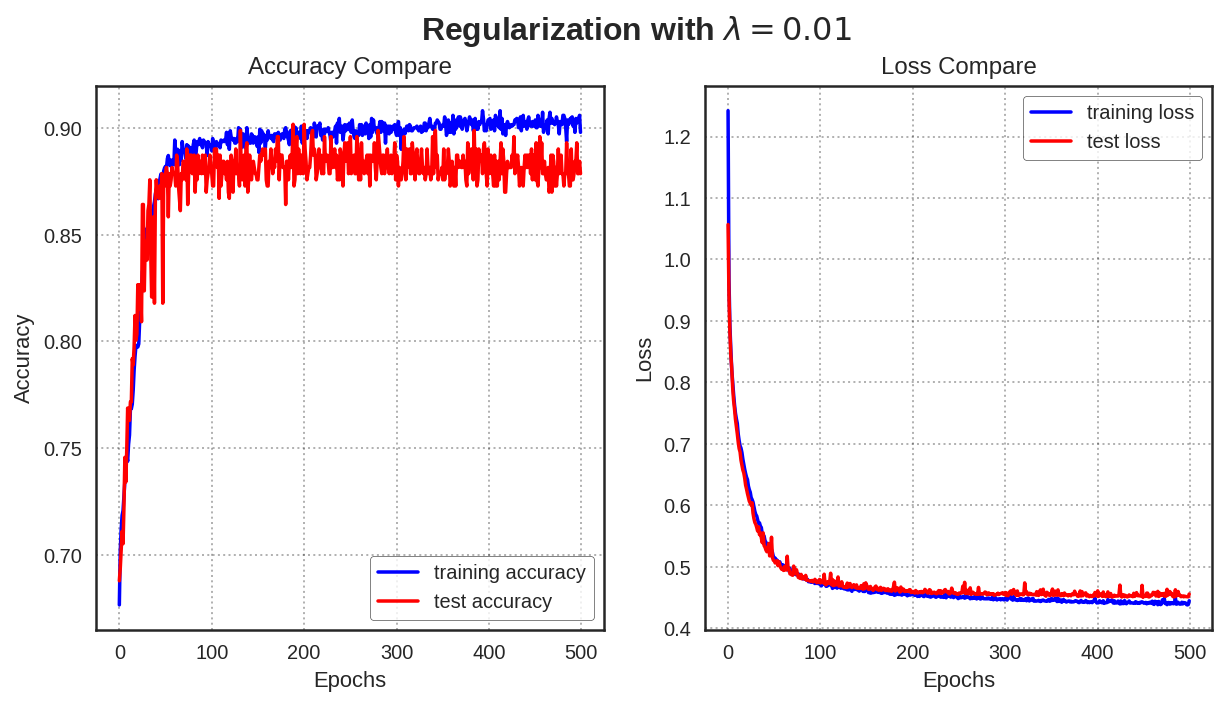

In [92]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.01$',fontsize=16, fontweight='bold')
plt.show()

In [0]:
model_2_train_score = model_2.evaluate(X_train,y_train,verbose=0)

In [0]:
model_2_score = model_2.evaluate(X_test,y_test,verbose=0)

In [95]:
print("Train loss: ",model_2_train_score[0])
print("Test loss: ",model_2_score[0])
print("Train accuracy: %.4f%%"% (model_2_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_2_score[1]*100))

Train loss:  0.43896796747330474
Test loss:  0.45546428213229756
Train accuracy: 90.3039%
Test accuracy: 87.8613%


In [96]:
y_pred_class_2 = model_2.predict_classes(X_test,verbose=0)
y_test_class_2= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_2,y_pred_class_2))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96       240
          1       0.74      0.91      0.82        79
          2       0.00      0.00      0.00        17
          3       0.31      0.50      0.38        10

avg / total       0.86      0.88      0.87       346



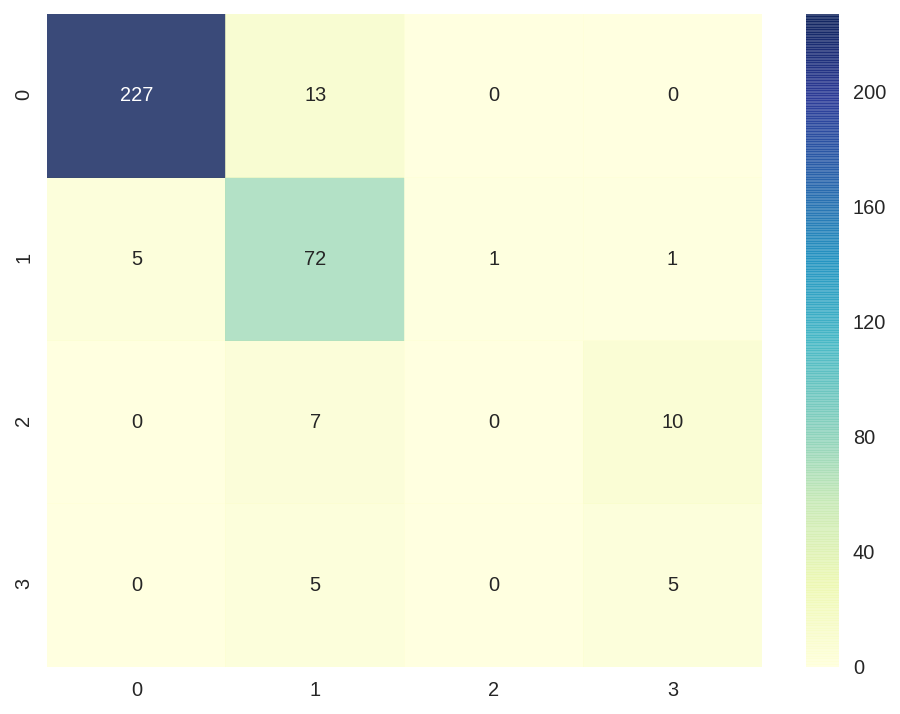

In [97]:
plot_confusion_matrix(model_2, X_test, y_test_class_2)

## 3. Neural Network with L2 Regularization $\lambda=0.001$

In [0]:
reg_3 = regularizers.l2(l=0.001)
model_3 = Sequential()
model_3.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_3))
model_3.add(Dense(8, activation='relu',kernel_regularizer=reg_3))
model_3.add(Dense(4, activation='softmax',kernel_regularizer=reg_3))
model_3.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [99]:
model_3.history = model_3.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 487us/step - loss: 1.1788 - acc: 0.4450 - val_loss: 1.0191 - val_acc: 0.6936
Epoch 2/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.9646 - acc: 0.7019 - val_loss: 0.9061 - val_acc: 0.6936
Epoch 3/500
1382/1382 [==============================] - 0s 195us/step - loss: 0.8596 - acc: 0.6983 - val_loss: 0.8093 - val_acc: 0.6908
Epoch 4/500
1382/1382 [==============================] - 0s 196us/step - loss: 0.7632 - acc: 0.7048 - val_loss: 0.7271 - val_acc: 0.6965
Epoch 5/500
1382/1382 [==============================] - 0s 197us/step - loss: 0.6934 - acc: 0.7185 - val_loss: 0.6862 - val_acc: 0.6994
Epoch 6/500
1382/1382 [==============================] - 0s 199us/step - loss: 0.6604 - acc: 0.7344 - val_loss: 0.6589 - val_acc: 0.7139
Epoch 7/500
1382/1382 [==============================] - 0s 201us/step - loss: 0.6396 - acc: 0.7352 - val_loss: 0.6313 - val_acc: 0

1382/1382 [==============================] - 0s 238us/step - loss: 0.5252 - acc: 0.7771 - val_loss: 0.5063 - val_acc: 0.8121
Epoch 15/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.5114 - acc: 0.7844 - val_loss: 0.4924 - val_acc: 0.8121
Epoch 16/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.4964 - acc: 0.8003 - val_loss: 0.4772 - val_acc: 0.8266
Epoch 17/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.4816 - acc: 0.7988 - val_loss: 0.4637 - val_acc: 0.8266
Epoch 18/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.4687 - acc: 0.8148 - val_loss: 0.4581 - val_acc: 0.8092
Epoch 19/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.4617 - acc: 0.8140 - val_loss: 0.4366 - val_acc: 0.8324
Epoch 20/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.4463 - acc: 0.8307 - val_loss: 0.4367 - val_acc: 0.8064
Epoch 21/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 234us/step - loss: 0.3739 - acc: 0.8618 - val_loss: 0.3606 - val_acc: 0.8728
Epoch 29/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.3685 - acc: 0.8698 - val_loss: 0.3614 - val_acc: 0.8786
Epoch 30/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.3617 - acc: 0.8763 - val_loss: 0.3525 - val_acc: 0.8671
Epoch 31/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.3572 - acc: 0.8770 - val_loss: 0.3465 - val_acc: 0.8728
Epoch 32/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.3488 - acc: 0.8755 - val_loss: 0.3601 - val_acc: 0.8757
Epoch 33/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.3457 - acc: 0.8813 - val_loss: 0.3530 - val_acc: 0.8555
Epoch 34/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.3437 - acc: 0.8777 - val_loss: 0.3368 - val_acc: 0.8873
Epoch 35/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 235us/step - loss: 0.3165 - acc: 0.8944 - val_loss: 0.3260 - val_acc: 0.8902
Epoch 43/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.3159 - acc: 0.8951 - val_loss: 0.3181 - val_acc: 0.8902
Epoch 44/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.3119 - acc: 0.8965 - val_loss: 0.3177 - val_acc: 0.8815
Epoch 45/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.3122 - acc: 0.8958 - val_loss: 0.3236 - val_acc: 0.8815
Epoch 46/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.3125 - acc: 0.8987 - val_loss: 0.3108 - val_acc: 0.8902
Epoch 47/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.3074 - acc: 0.9023 - val_loss: 0.3117 - val_acc: 0.8902
Epoch 48/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.3040 - acc: 0.9016 - val_loss: 0.3081 - val_acc: 0.8873
Epoch 49/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 231us/step - loss: 0.2946 - acc: 0.9038 - val_loss: 0.2990 - val_acc: 0.8873
Epoch 57/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2953 - acc: 0.9038 - val_loss: 0.2975 - val_acc: 0.8902
Epoch 58/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.3019 - acc: 0.9009 - val_loss: 0.2945 - val_acc: 0.8873
Epoch 59/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2932 - acc: 0.9059 - val_loss: 0.2927 - val_acc: 0.8960
Epoch 60/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2945 - acc: 0.9001 - val_loss: 0.2976 - val_acc: 0.8873
Epoch 61/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2863 - acc: 0.9045 - val_loss: 0.2948 - val_acc: 0.9017
Epoch 62/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2862 - acc: 0.9067 - val_loss: 0.2924 - val_acc: 0.8931
Epoch 63/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 229us/step - loss: 0.2790 - acc: 0.9081 - val_loss: 0.2850 - val_acc: 0.8960
Epoch 70/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2785 - acc: 0.9110 - val_loss: 0.2852 - val_acc: 0.8960
Epoch 71/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2767 - acc: 0.9110 - val_loss: 0.2844 - val_acc: 0.9046
Epoch 72/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2785 - acc: 0.9096 - val_loss: 0.2940 - val_acc: 0.9046
Epoch 73/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2796 - acc: 0.9059 - val_loss: 0.2826 - val_acc: 0.8988
Epoch 74/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.2787 - acc: 0.9124 - val_loss: 0.2828 - val_acc: 0.9046
Epoch 75/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2749 - acc: 0.9088 - val_loss: 0.2840 - val_acc: 0.9017
Epoch 76/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 229us/step - loss: 0.2735 - acc: 0.9110 - val_loss: 0.2786 - val_acc: 0.9133
Epoch 83/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.2724 - acc: 0.9103 - val_loss: 0.2852 - val_acc: 0.9075
Epoch 84/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2693 - acc: 0.9139 - val_loss: 0.2760 - val_acc: 0.9046
Epoch 85/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2708 - acc: 0.9088 - val_loss: 0.2800 - val_acc: 0.9046
Epoch 86/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2659 - acc: 0.9088 - val_loss: 0.2903 - val_acc: 0.9104
Epoch 87/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2678 - acc: 0.9153 - val_loss: 0.2739 - val_acc: 0.9162
Epoch 88/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2657 - acc: 0.9168 - val_loss: 0.3000 - val_acc: 0.9017
Epoch 89/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 231us/step - loss: 0.2592 - acc: 0.9161 - val_loss: 0.2711 - val_acc: 0.9162
Epoch 97/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2582 - acc: 0.9175 - val_loss: 0.2802 - val_acc: 0.9075
Epoch 98/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2591 - acc: 0.9124 - val_loss: 0.2898 - val_acc: 0.9075
Epoch 99/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2616 - acc: 0.9161 - val_loss: 0.2699 - val_acc: 0.9162
Epoch 100/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2558 - acc: 0.9197 - val_loss: 0.2676 - val_acc: 0.9162
Epoch 101/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.2577 - acc: 0.9161 - val_loss: 0.2734 - val_acc: 0.9133
Epoch 102/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.2625 - acc: 0.9161 - val_loss: 0.2664 - val_acc: 0.9162
Epoch 103/500
1382/1382 [===================

Epoch 110/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2514 - acc: 0.9197 - val_loss: 0.2637 - val_acc: 0.9104
Epoch 111/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2522 - acc: 0.9168 - val_loss: 0.2640 - val_acc: 0.9191
Epoch 112/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.2507 - acc: 0.9211 - val_loss: 0.2622 - val_acc: 0.9162
Epoch 113/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2495 - acc: 0.9190 - val_loss: 0.2690 - val_acc: 0.9220
Epoch 114/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2559 - acc: 0.9182 - val_loss: 0.2682 - val_acc: 0.9191
Epoch 115/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.2546 - acc: 0.9226 - val_loss: 0.2646 - val_acc: 0.9133
Epoch 116/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2552 - acc: 0.9153 - val_loss: 0.2628 - val_acc: 0.9249
Epoch 117/500
1382/1382 [==

1382/1382 [==============================] - 0s 230us/step - loss: 0.2450 - acc: 0.9247 - val_loss: 0.2599 - val_acc: 0.9162
Epoch 124/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2414 - acc: 0.9247 - val_loss: 0.2573 - val_acc: 0.9220
Epoch 125/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2397 - acc: 0.9240 - val_loss: 0.2643 - val_acc: 0.9191
Epoch 126/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.2419 - acc: 0.9298 - val_loss: 0.2545 - val_acc: 0.9191
Epoch 127/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2427 - acc: 0.9226 - val_loss: 0.2634 - val_acc: 0.9162
Epoch 128/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2430 - acc: 0.9269 - val_loss: 0.2538 - val_acc: 0.9220
Epoch 129/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2406 - acc: 0.9255 - val_loss: 0.2529 - val_acc: 0.9162
Epoch 130/500
1382/1382 [================

Epoch 137/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2356 - acc: 0.9291 - val_loss: 0.2522 - val_acc: 0.9335
Epoch 138/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2349 - acc: 0.9327 - val_loss: 0.2529 - val_acc: 0.9133
Epoch 139/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2333 - acc: 0.9313 - val_loss: 0.2523 - val_acc: 0.9249
Epoch 140/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2320 - acc: 0.9327 - val_loss: 0.2495 - val_acc: 0.9191
Epoch 141/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2331 - acc: 0.9320 - val_loss: 0.2634 - val_acc: 0.9133
Epoch 142/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2334 - acc: 0.9284 - val_loss: 0.2531 - val_acc: 0.9220
Epoch 143/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2310 - acc: 0.9305 - val_loss: 0.2644 - val_acc: 0.9191
Epoch 144/500
1382/1382 [==

1382/1382 [==============================] - 0s 226us/step - loss: 0.2365 - acc: 0.9313 - val_loss: 0.2492 - val_acc: 0.9220
Epoch 151/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.2314 - acc: 0.9320 - val_loss: 0.2442 - val_acc: 0.9277
Epoch 152/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.2271 - acc: 0.9363 - val_loss: 0.2476 - val_acc: 0.9277
Epoch 153/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2281 - acc: 0.9305 - val_loss: 0.2489 - val_acc: 0.9162
Epoch 154/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2252 - acc: 0.9356 - val_loss: 0.2498 - val_acc: 0.9220
Epoch 155/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2248 - acc: 0.9349 - val_loss: 0.2505 - val_acc: 0.9220
Epoch 156/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.2260 - acc: 0.9313 - val_loss: 0.2453 - val_acc: 0.9220
Epoch 157/500
1382/1382 [================

Epoch 164/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2234 - acc: 0.9385 - val_loss: 0.2392 - val_acc: 0.9277
Epoch 165/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2217 - acc: 0.9363 - val_loss: 0.2417 - val_acc: 0.9162
Epoch 166/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2249 - acc: 0.9320 - val_loss: 0.2396 - val_acc: 0.9249
Epoch 167/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.2172 - acc: 0.9407 - val_loss: 0.2484 - val_acc: 0.9306
Epoch 168/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2194 - acc: 0.9327 - val_loss: 0.2401 - val_acc: 0.9277
Epoch 169/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2227 - acc: 0.9342 - val_loss: 0.2401 - val_acc: 0.9249
Epoch 170/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2209 - acc: 0.9378 - val_loss: 0.2405 - val_acc: 0.9162
Epoch 171/500
1382/1382 [==

1382/1382 [==============================] - 0s 230us/step - loss: 0.2163 - acc: 0.9356 - val_loss: 0.2433 - val_acc: 0.9249
Epoch 178/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2145 - acc: 0.9399 - val_loss: 0.2471 - val_acc: 0.9306
Epoch 179/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2145 - acc: 0.9414 - val_loss: 0.2428 - val_acc: 0.9191
Epoch 180/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2144 - acc: 0.9378 - val_loss: 0.2386 - val_acc: 0.9249
Epoch 181/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2133 - acc: 0.9392 - val_loss: 0.2332 - val_acc: 0.9277
Epoch 182/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2114 - acc: 0.9450 - val_loss: 0.2500 - val_acc: 0.9249
Epoch 183/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2153 - acc: 0.9392 - val_loss: 0.2347 - val_acc: 0.9249
Epoch 184/500
1382/1382 [================

Epoch 191/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2132 - acc: 0.9385 - val_loss: 0.2348 - val_acc: 0.9249
Epoch 192/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2105 - acc: 0.9378 - val_loss: 0.2372 - val_acc: 0.9277
Epoch 193/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2132 - acc: 0.9399 - val_loss: 0.2316 - val_acc: 0.9249
Epoch 194/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2139 - acc: 0.9414 - val_loss: 0.2298 - val_acc: 0.9277
Epoch 195/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2090 - acc: 0.9421 - val_loss: 0.2358 - val_acc: 0.9277
Epoch 196/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.2086 - acc: 0.9414 - val_loss: 0.2297 - val_acc: 0.9249
Epoch 197/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2080 - acc: 0.9436 - val_loss: 0.2297 - val_acc: 0.9335
Epoch 198/500
1382/1382 [==

Epoch 205/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2063 - acc: 0.9457 - val_loss: 0.2277 - val_acc: 0.9277
Epoch 206/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2054 - acc: 0.9450 - val_loss: 0.2279 - val_acc: 0.9306
Epoch 207/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.2061 - acc: 0.9428 - val_loss: 0.2265 - val_acc: 0.9306
Epoch 208/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2047 - acc: 0.9465 - val_loss: 0.2275 - val_acc: 0.9277
Epoch 209/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.2084 - acc: 0.9450 - val_loss: 0.2434 - val_acc: 0.9306
Epoch 210/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2055 - acc: 0.9443 - val_loss: 0.2252 - val_acc: 0.9393
Epoch 211/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1999 - acc: 0.9443 - val_loss: 0.2378 - val_acc: 0.9306
Epoch 212/500
1382/1382 [==

1382/1382 [==============================] - 0s 230us/step - loss: 0.2006 - acc: 0.9428 - val_loss: 0.2247 - val_acc: 0.9306
Epoch 219/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1985 - acc: 0.9479 - val_loss: 0.2356 - val_acc: 0.9277
Epoch 220/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2006 - acc: 0.9436 - val_loss: 0.2214 - val_acc: 0.9364
Epoch 221/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1990 - acc: 0.9465 - val_loss: 0.2236 - val_acc: 0.9335
Epoch 222/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1982 - acc: 0.9472 - val_loss: 0.2263 - val_acc: 0.9249
Epoch 223/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1998 - acc: 0.9457 - val_loss: 0.2219 - val_acc: 0.9335
Epoch 224/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1997 - acc: 0.9457 - val_loss: 0.2279 - val_acc: 0.9277
Epoch 225/500
1382/1382 [================

1382/1382 [==============================] - 0s 223us/step - loss: 0.1956 - acc: 0.9501 - val_loss: 0.2195 - val_acc: 0.9306
Epoch 233/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1976 - acc: 0.9443 - val_loss: 0.2361 - val_acc: 0.9249
Epoch 234/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2019 - acc: 0.9414 - val_loss: 0.2223 - val_acc: 0.9335
Epoch 235/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1958 - acc: 0.9486 - val_loss: 0.2259 - val_acc: 0.9306
Epoch 236/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1987 - acc: 0.9450 - val_loss: 0.2187 - val_acc: 0.9335
Epoch 237/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1922 - acc: 0.9479 - val_loss: 0.2276 - val_acc: 0.9277
Epoch 238/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1980 - acc: 0.9436 - val_loss: 0.2188 - val_acc: 0.9364
Epoch 239/500
1382/1382 [================

Epoch 246/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1939 - acc: 0.9472 - val_loss: 0.2189 - val_acc: 0.9306
Epoch 247/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1911 - acc: 0.9479 - val_loss: 0.2155 - val_acc: 0.9335
Epoch 248/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1910 - acc: 0.9522 - val_loss: 0.2172 - val_acc: 0.9277
Epoch 249/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1928 - acc: 0.9501 - val_loss: 0.2169 - val_acc: 0.9393
Epoch 250/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1885 - acc: 0.9537 - val_loss: 0.2197 - val_acc: 0.9364
Epoch 251/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1926 - acc: 0.9465 - val_loss: 0.2235 - val_acc: 0.9335
Epoch 252/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1911 - acc: 0.9486 - val_loss: 0.2140 - val_acc: 0.9393
Epoch 253/500
1382/1382 [==

1382/1382 [==============================] - 0s 224us/step - loss: 0.1858 - acc: 0.9530 - val_loss: 0.2199 - val_acc: 0.9364
Epoch 260/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1891 - acc: 0.9501 - val_loss: 0.2125 - val_acc: 0.9393
Epoch 261/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1878 - acc: 0.9486 - val_loss: 0.2117 - val_acc: 0.9422
Epoch 262/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1866 - acc: 0.9537 - val_loss: 0.2207 - val_acc: 0.9422
Epoch 263/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1872 - acc: 0.9508 - val_loss: 0.2139 - val_acc: 0.9364
Epoch 264/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1866 - acc: 0.9479 - val_loss: 0.2116 - val_acc: 0.9393
Epoch 265/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1886 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 266/500
1382/1382 [================

1382/1382 [==============================] - 0s 236us/step - loss: 0.1839 - acc: 0.9537 - val_loss: 0.2087 - val_acc: 0.9393
Epoch 273/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1842 - acc: 0.9551 - val_loss: 0.2093 - val_acc: 0.9364
Epoch 274/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1835 - acc: 0.9515 - val_loss: 0.2070 - val_acc: 0.9422
Epoch 275/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1862 - acc: 0.9479 - val_loss: 0.2152 - val_acc: 0.9364
Epoch 276/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1824 - acc: 0.9537 - val_loss: 0.2084 - val_acc: 0.9364
Epoch 277/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1844 - acc: 0.9530 - val_loss: 0.2117 - val_acc: 0.9422
Epoch 278/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1839 - acc: 0.9522 - val_loss: 0.2114 - val_acc: 0.9335
Epoch 279/500
1382/1382 [================

1382/1382 [==============================] - 0s 227us/step - loss: 0.1808 - acc: 0.9522 - val_loss: 0.2095 - val_acc: 0.9393
Epoch 287/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1845 - acc: 0.9537 - val_loss: 0.2059 - val_acc: 0.9422
Epoch 288/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1827 - acc: 0.9522 - val_loss: 0.2073 - val_acc: 0.9451
Epoch 289/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1804 - acc: 0.9580 - val_loss: 0.2046 - val_acc: 0.9451
Epoch 290/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1841 - acc: 0.9479 - val_loss: 0.2077 - val_acc: 0.9422
Epoch 291/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1797 - acc: 0.9544 - val_loss: 0.2136 - val_acc: 0.9364
Epoch 292/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1812 - acc: 0.9559 - val_loss: 0.2067 - val_acc: 0.9422
Epoch 293/500
1382/1382 [================

Epoch 300/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1754 - acc: 0.9544 - val_loss: 0.2020 - val_acc: 0.9480
Epoch 301/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1771 - acc: 0.9537 - val_loss: 0.2031 - val_acc: 0.9451
Epoch 302/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1788 - acc: 0.9559 - val_loss: 0.2060 - val_acc: 0.9422
Epoch 303/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1817 - acc: 0.9486 - val_loss: 0.2015 - val_acc: 0.9538
Epoch 304/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1775 - acc: 0.9580 - val_loss: 0.2073 - val_acc: 0.9422
Epoch 305/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1777 - acc: 0.9580 - val_loss: 0.2087 - val_acc: 0.9393
Epoch 306/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1815 - acc: 0.9566 - val_loss: 0.2015 - val_acc: 0.9422
Epoch 307/500
1382/1382 [==

1382/1382 [==============================] - 0s 223us/step - loss: 0.1754 - acc: 0.9573 - val_loss: 0.2053 - val_acc: 0.9422
Epoch 314/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1762 - acc: 0.9566 - val_loss: 0.2033 - val_acc: 0.9480
Epoch 315/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1742 - acc: 0.9595 - val_loss: 0.2026 - val_acc: 0.9480
Epoch 316/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1727 - acc: 0.9580 - val_loss: 0.2170 - val_acc: 0.9393
Epoch 317/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1877 - acc: 0.9501 - val_loss: 0.1978 - val_acc: 0.9480
Epoch 318/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1740 - acc: 0.9602 - val_loss: 0.1991 - val_acc: 0.9509
Epoch 319/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1729 - acc: 0.9609 - val_loss: 0.2300 - val_acc: 0.9306
Epoch 320/500
1382/1382 [================

1382/1382 [==============================] - 0s 228us/step - loss: 0.1712 - acc: 0.9616 - val_loss: 0.2042 - val_acc: 0.9480
Epoch 327/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1699 - acc: 0.9609 - val_loss: 0.1969 - val_acc: 0.9509
Epoch 328/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1733 - acc: 0.9573 - val_loss: 0.2007 - val_acc: 0.9451
Epoch 329/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1717 - acc: 0.9588 - val_loss: 0.2057 - val_acc: 0.9480
Epoch 330/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1697 - acc: 0.9609 - val_loss: 0.2085 - val_acc: 0.9451
Epoch 331/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1721 - acc: 0.9588 - val_loss: 0.1971 - val_acc: 0.9538
Epoch 332/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1680 - acc: 0.9624 - val_loss: 0.1998 - val_acc: 0.9509
Epoch 333/500
1382/1382 [================

1382/1382 [==============================] - 0s 233us/step - loss: 0.1710 - acc: 0.9580 - val_loss: 0.1979 - val_acc: 0.9509
Epoch 340/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1733 - acc: 0.9537 - val_loss: 0.2054 - val_acc: 0.9451
Epoch 341/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1695 - acc: 0.9645 - val_loss: 0.1996 - val_acc: 0.9538
Epoch 342/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1704 - acc: 0.9602 - val_loss: 0.1958 - val_acc: 0.9566
Epoch 343/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1740 - acc: 0.9580 - val_loss: 0.1982 - val_acc: 0.9509
Epoch 344/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1699 - acc: 0.9624 - val_loss: 0.1949 - val_acc: 0.9538
Epoch 345/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1688 - acc: 0.9595 - val_loss: 0.1961 - val_acc: 0.9480
Epoch 346/500
1382/1382 [================

1382/1382 [==============================] - 0s 227us/step - loss: 0.1650 - acc: 0.9624 - val_loss: 0.1948 - val_acc: 0.9480
Epoch 353/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1665 - acc: 0.9631 - val_loss: 0.2020 - val_acc: 0.9480
Epoch 354/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1684 - acc: 0.9595 - val_loss: 0.1971 - val_acc: 0.9595
Epoch 355/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1660 - acc: 0.9609 - val_loss: 0.1921 - val_acc: 0.9595
Epoch 356/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1638 - acc: 0.9645 - val_loss: 0.1975 - val_acc: 0.9509
Epoch 357/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1634 - acc: 0.9653 - val_loss: 0.1936 - val_acc: 0.9566
Epoch 358/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1646 - acc: 0.9645 - val_loss: 0.1938 - val_acc: 0.9509
Epoch 359/500
1382/1382 [================

1382/1382 [==============================] - 0s 228us/step - loss: 0.1631 - acc: 0.9653 - val_loss: 0.1916 - val_acc: 0.9566
Epoch 366/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1641 - acc: 0.9653 - val_loss: 0.1987 - val_acc: 0.9538
Epoch 367/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1643 - acc: 0.9653 - val_loss: 0.1923 - val_acc: 0.9595
Epoch 368/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1605 - acc: 0.9660 - val_loss: 0.2027 - val_acc: 0.9480
Epoch 369/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1613 - acc: 0.9645 - val_loss: 0.1927 - val_acc: 0.9538
Epoch 370/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1641 - acc: 0.9609 - val_loss: 0.1911 - val_acc: 0.9595
Epoch 371/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1633 - acc: 0.9609 - val_loss: 0.1894 - val_acc: 0.9595
Epoch 372/500
1382/1382 [================

1382/1382 [==============================] - 0s 230us/step - loss: 0.1599 - acc: 0.9682 - val_loss: 0.1941 - val_acc: 0.9538
Epoch 380/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1628 - acc: 0.9667 - val_loss: 0.1923 - val_acc: 0.9595
Epoch 381/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1619 - acc: 0.9645 - val_loss: 0.1956 - val_acc: 0.9509
Epoch 382/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1604 - acc: 0.9645 - val_loss: 0.1951 - val_acc: 0.9538
Epoch 383/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1583 - acc: 0.9711 - val_loss: 0.1916 - val_acc: 0.9595
Epoch 384/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1597 - acc: 0.9682 - val_loss: 0.1880 - val_acc: 0.9653
Epoch 385/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1589 - acc: 0.9660 - val_loss: 0.1887 - val_acc: 0.9653
Epoch 386/500
1382/1382 [================

1382/1382 [==============================] - 0s 238us/step - loss: 0.1580 - acc: 0.9740 - val_loss: 0.1917 - val_acc: 0.9566
Epoch 394/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1596 - acc: 0.9653 - val_loss: 0.1874 - val_acc: 0.9595
Epoch 395/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1625 - acc: 0.9667 - val_loss: 0.1905 - val_acc: 0.9566
Epoch 396/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1572 - acc: 0.9732 - val_loss: 0.1930 - val_acc: 0.9451
Epoch 397/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1571 - acc: 0.9682 - val_loss: 0.1864 - val_acc: 0.9624
Epoch 398/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1587 - acc: 0.9667 - val_loss: 0.1851 - val_acc: 0.9624
Epoch 399/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1558 - acc: 0.9682 - val_loss: 0.1878 - val_acc: 0.9566
Epoch 400/500
1382/1382 [================

1382/1382 [==============================] - 0s 225us/step - loss: 0.1567 - acc: 0.9703 - val_loss: 0.1882 - val_acc: 0.9538
Epoch 408/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1573 - acc: 0.9660 - val_loss: 0.1864 - val_acc: 0.9595
Epoch 409/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1568 - acc: 0.9711 - val_loss: 0.1852 - val_acc: 0.9595
Epoch 410/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1571 - acc: 0.9674 - val_loss: 0.2129 - val_acc: 0.9422
Epoch 411/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1597 - acc: 0.9660 - val_loss: 0.1849 - val_acc: 0.9624
Epoch 412/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1534 - acc: 0.9711 - val_loss: 0.1894 - val_acc: 0.9566
Epoch 413/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1551 - acc: 0.9725 - val_loss: 0.1833 - val_acc: 0.9624
Epoch 414/500
1382/1382 [================

1382/1382 [==============================] - 0s 229us/step - loss: 0.1540 - acc: 0.9718 - val_loss: 0.2006 - val_acc: 0.9538
Epoch 421/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1526 - acc: 0.9718 - val_loss: 0.1822 - val_acc: 0.9624
Epoch 422/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1526 - acc: 0.9689 - val_loss: 0.1850 - val_acc: 0.9595
Epoch 423/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1534 - acc: 0.9682 - val_loss: 0.1809 - val_acc: 0.9624
Epoch 424/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1515 - acc: 0.9740 - val_loss: 0.1828 - val_acc: 0.9624
Epoch 425/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1535 - acc: 0.9696 - val_loss: 0.1832 - val_acc: 0.9595
Epoch 426/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1511 - acc: 0.9732 - val_loss: 0.1895 - val_acc: 0.9624
Epoch 427/500
1382/1382 [================

1382/1382 [==============================] - 0s 227us/step - loss: 0.1514 - acc: 0.9732 - val_loss: 0.1806 - val_acc: 0.9624
Epoch 434/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1512 - acc: 0.9689 - val_loss: 0.1834 - val_acc: 0.9595
Epoch 435/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1506 - acc: 0.9718 - val_loss: 0.1820 - val_acc: 0.9624
Epoch 436/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.1504 - acc: 0.9718 - val_loss: 0.1859 - val_acc: 0.9566
Epoch 437/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1505 - acc: 0.9740 - val_loss: 0.1854 - val_acc: 0.9566
Epoch 438/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1524 - acc: 0.9754 - val_loss: 0.1794 - val_acc: 0.9624
Epoch 439/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1494 - acc: 0.9732 - val_loss: 0.1828 - val_acc: 0.9624
Epoch 440/500
1382/1382 [================

1382/1382 [==============================] - 0s 236us/step - loss: 0.1504 - acc: 0.9725 - val_loss: 0.1963 - val_acc: 0.9538
Epoch 447/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1485 - acc: 0.9797 - val_loss: 0.1806 - val_acc: 0.9595
Epoch 448/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1485 - acc: 0.9761 - val_loss: 0.1938 - val_acc: 0.9538
Epoch 449/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1502 - acc: 0.9761 - val_loss: 0.1876 - val_acc: 0.9624
Epoch 450/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1489 - acc: 0.9754 - val_loss: 0.1865 - val_acc: 0.9624
Epoch 451/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1483 - acc: 0.9797 - val_loss: 0.1819 - val_acc: 0.9624
Epoch 452/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1508 - acc: 0.9725 - val_loss: 0.1822 - val_acc: 0.9624
Epoch 453/500
1382/1382 [================

1382/1382 [==============================] - 0s 232us/step - loss: 0.1480 - acc: 0.9754 - val_loss: 0.1817 - val_acc: 0.9624
Epoch 460/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1437 - acc: 0.9819 - val_loss: 0.1758 - val_acc: 0.9624
Epoch 461/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1481 - acc: 0.9768 - val_loss: 0.1789 - val_acc: 0.9595
Epoch 462/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1457 - acc: 0.9768 - val_loss: 0.2003 - val_acc: 0.9509
Epoch 463/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1495 - acc: 0.9718 - val_loss: 0.1903 - val_acc: 0.9595
Epoch 464/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1482 - acc: 0.9754 - val_loss: 0.2000 - val_acc: 0.9538
Epoch 465/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1470 - acc: 0.9740 - val_loss: 0.1780 - val_acc: 0.9624
Epoch 466/500
1382/1382 [================

Epoch 473/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1454 - acc: 0.9776 - val_loss: 0.1728 - val_acc: 0.9624
Epoch 474/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1444 - acc: 0.9776 - val_loss: 0.1806 - val_acc: 0.9653
Epoch 475/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1450 - acc: 0.9790 - val_loss: 0.1786 - val_acc: 0.9595
Epoch 476/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1498 - acc: 0.9761 - val_loss: 0.1791 - val_acc: 0.9595
Epoch 477/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1438 - acc: 0.9797 - val_loss: 0.1836 - val_acc: 0.9595
Epoch 478/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1450 - acc: 0.9790 - val_loss: 0.1807 - val_acc: 0.9624
Epoch 479/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1468 - acc: 0.9790 - val_loss: 0.1736 - val_acc: 0.9682
Epoch 480/500
1382/1382 [==

1382/1382 [==============================] - 0s 220us/step - loss: 0.1419 - acc: 0.9797 - val_loss: 0.1730 - val_acc: 0.9595
Epoch 487/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1410 - acc: 0.9776 - val_loss: 0.1813 - val_acc: 0.9653
Epoch 488/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1429 - acc: 0.9776 - val_loss: 0.1748 - val_acc: 0.9595
Epoch 489/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1430 - acc: 0.9783 - val_loss: 0.1821 - val_acc: 0.9653
Epoch 490/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1419 - acc: 0.9805 - val_loss: 0.1769 - val_acc: 0.9624
Epoch 491/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1420 - acc: 0.9805 - val_loss: 0.1711 - val_acc: 0.9653
Epoch 492/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1422 - acc: 0.9776 - val_loss: 0.1809 - val_acc: 0.9624
Epoch 493/500
1382/1382 [================

1382/1382 [==============================] - 0s 221us/step - loss: 0.1402 - acc: 0.9797 - val_loss: 0.1771 - val_acc: 0.9624
Epoch 500/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.1435 - acc: 0.9776 - val_loss: 0.1770 - val_acc: 0.9682


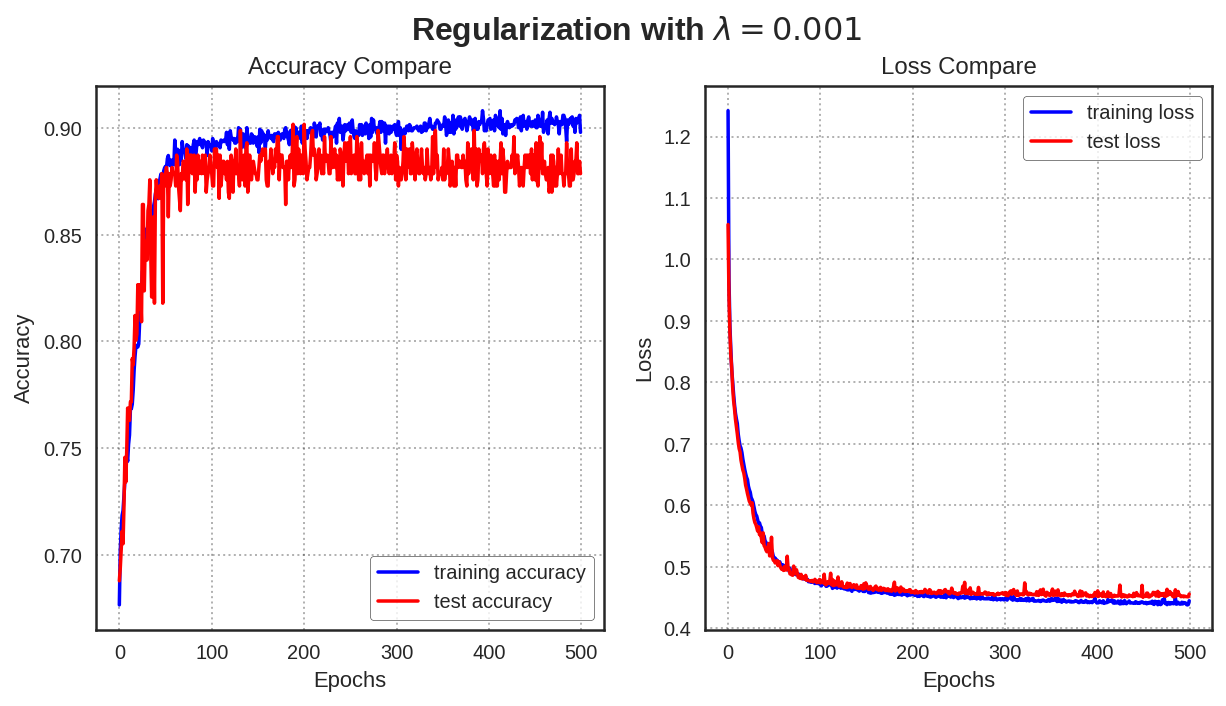

In [100]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.001$',fontsize=16, fontweight='bold')
plt.show()

In [101]:
model_3_train_score = model_3.evaluate(X_train,y_train,verbose=0)
model_3_score = model_3.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_3_train_score[0])
print("Test loss: ",model_3_score[0])
print("Train accuracy: %.4f%%"% (model_3_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_3_score[1]*100))

Train loss:  0.13804458698470753
Test loss:  0.17697299388102714
Train accuracy: 98.3357%
Test accuracy: 96.8208%


In [102]:
y_pred_class_3 = model_3.predict_classes(X_test,verbose=0)
y_test_class_3= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_3,y_pred_class_3))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99       240
          1       0.91      0.95      0.93        79
          2       0.85      1.00      0.92        17
          3       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97       346



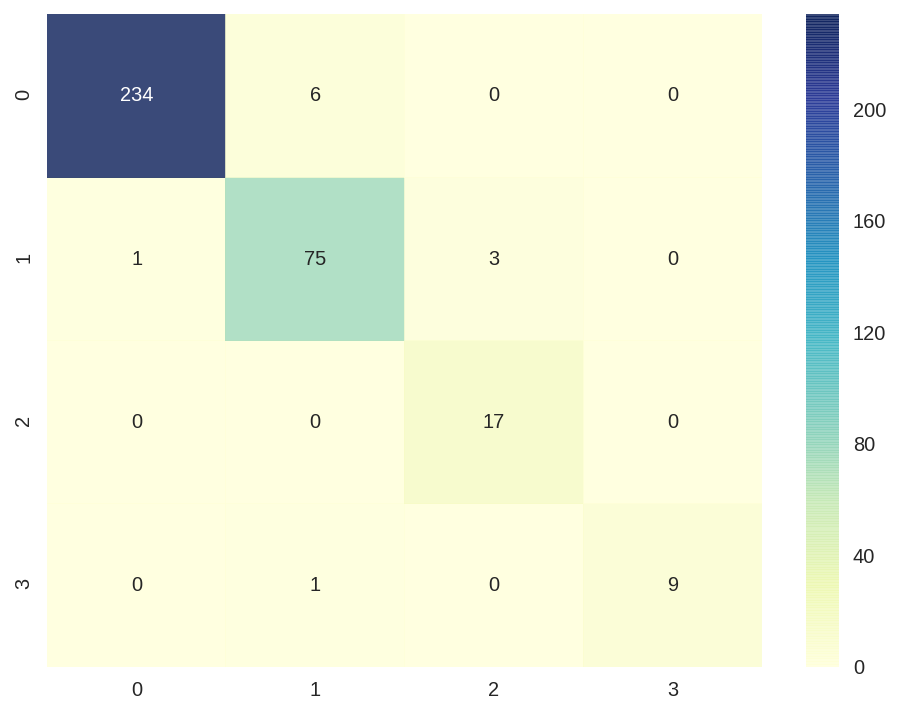

In [103]:
plot_confusion_matrix(model_3, X_test, y_test_class_3)

## 4. Neural Network with L2 Regularization $\lambda=0.0001$

In [0]:
reg_4 = regularizers.l2(l=0.0001)
model_4 = Sequential()
model_4.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_4))
model_4.add(Dense(8, activation='relu',kernel_regularizer=reg_4))
model_4.add(Dense(4, activation='softmax',kernel_regularizer=reg_4))
model_4.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [105]:
model_4.history = model_4.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 533us/step - loss: 1.6336 - acc: 0.1708 - val_loss: 1.1014 - val_acc: 0.6040
Epoch 2/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.9701 - acc: 0.6860 - val_loss: 0.8417 - val_acc: 0.6936
Epoch 3/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.8023 - acc: 0.7019 - val_loss: 0.7689 - val_acc: 0.6936
Epoch 4/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.7449 - acc: 0.7026 - val_loss: 0.7305 - val_acc: 0.6936
Epoch 5/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.7120 - acc: 0.7033 - val_loss: 0.7055 - val_acc: 0.6936
Epoch 6/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.6864 - acc: 0.7098 - val_loss: 0.6768 - val_acc: 0.7081
Epoch 7/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.6619 - acc: 0.7192 - val_loss: 0.6525 - val_acc: 0

1382/1382 [==============================] - 0s 235us/step - loss: 0.5534 - acc: 0.7453 - val_loss: 0.5374 - val_acc: 0.7775
Epoch 15/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.5400 - acc: 0.7612 - val_loss: 0.5177 - val_acc: 0.7919
Epoch 16/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.5285 - acc: 0.7721 - val_loss: 0.5048 - val_acc: 0.7948
Epoch 17/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.5222 - acc: 0.7670 - val_loss: 0.4926 - val_acc: 0.8035
Epoch 18/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.5099 - acc: 0.7721 - val_loss: 0.4838 - val_acc: 0.8035
Epoch 19/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.4976 - acc: 0.7779 - val_loss: 0.4755 - val_acc: 0.8092
Epoch 20/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.4905 - acc: 0.7909 - val_loss: 0.4629 - val_acc: 0.8179
Epoch 21/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 224us/step - loss: 0.4131 - acc: 0.8386 - val_loss: 0.3860 - val_acc: 0.8584
Epoch 29/500
1382/1382 [==============================] - 0s 252us/step - loss: 0.4028 - acc: 0.8386 - val_loss: 0.3980 - val_acc: 0.8266
Epoch 30/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.3991 - acc: 0.8480 - val_loss: 0.3665 - val_acc: 0.8613
Epoch 31/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.3825 - acc: 0.8524 - val_loss: 0.3735 - val_acc: 0.8353
Epoch 32/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.3771 - acc: 0.8546 - val_loss: 0.3507 - val_acc: 0.8699
Epoch 33/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.3680 - acc: 0.8632 - val_loss: 0.3437 - val_acc: 0.8757
Epoch 34/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.3566 - acc: 0.8683 - val_loss: 0.3403 - val_acc: 0.8671
Epoch 35/500
1382/1382 [=======================

Epoch 42/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.3016 - acc: 0.8886 - val_loss: 0.2843 - val_acc: 0.9017
Epoch 43/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.2939 - acc: 0.8922 - val_loss: 0.2796 - val_acc: 0.8960
Epoch 44/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.2850 - acc: 0.8944 - val_loss: 0.2780 - val_acc: 0.9046
Epoch 45/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.2850 - acc: 0.8929 - val_loss: 0.2753 - val_acc: 0.8988
Epoch 46/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2774 - acc: 0.8900 - val_loss: 0.2671 - val_acc: 0.8988
Epoch 47/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2720 - acc: 0.8958 - val_loss: 0.2648 - val_acc: 0.9017
Epoch 48/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2729 - acc: 0.8965 - val_loss: 0.2671 - val_acc: 0.9017
Epoch 49/500
1382/1382 [==========

1382/1382 [==============================] - 0s 237us/step - loss: 0.2505 - acc: 0.9030 - val_loss: 0.2507 - val_acc: 0.9133
Epoch 57/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.2486 - acc: 0.9059 - val_loss: 0.2409 - val_acc: 0.9104
Epoch 58/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2324 - acc: 0.9110 - val_loss: 0.2464 - val_acc: 0.9075
Epoch 59/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.2347 - acc: 0.9117 - val_loss: 0.2304 - val_acc: 0.9075
Epoch 60/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2313 - acc: 0.9067 - val_loss: 0.2328 - val_acc: 0.9104
Epoch 61/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2306 - acc: 0.9168 - val_loss: 0.2273 - val_acc: 0.9075
Epoch 62/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2247 - acc: 0.9168 - val_loss: 0.2312 - val_acc: 0.9104
Epoch 63/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 227us/step - loss: 0.2104 - acc: 0.9204 - val_loss: 0.2202 - val_acc: 0.9249
Epoch 71/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2213 - acc: 0.9110 - val_loss: 0.2104 - val_acc: 0.9191
Epoch 72/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.2101 - acc: 0.9211 - val_loss: 0.2145 - val_acc: 0.9277
Epoch 73/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.2094 - acc: 0.9204 - val_loss: 0.2107 - val_acc: 0.9277
Epoch 74/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.2073 - acc: 0.9211 - val_loss: 0.2068 - val_acc: 0.9220
Epoch 75/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2025 - acc: 0.9276 - val_loss: 0.2043 - val_acc: 0.9393
Epoch 76/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.2031 - acc: 0.9247 - val_loss: 0.2131 - val_acc: 0.9162
Epoch 77/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 226us/step - loss: 0.1947 - acc: 0.9247 - val_loss: 0.1968 - val_acc: 0.9335
Epoch 85/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1969 - acc: 0.9313 - val_loss: 0.1999 - val_acc: 0.9335
Epoch 86/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1973 - acc: 0.9247 - val_loss: 0.2042 - val_acc: 0.9249
Epoch 87/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1942 - acc: 0.9276 - val_loss: 0.2130 - val_acc: 0.9306
Epoch 88/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1898 - acc: 0.9363 - val_loss: 0.1936 - val_acc: 0.9277
Epoch 89/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1886 - acc: 0.9334 - val_loss: 0.1920 - val_acc: 0.9364
Epoch 90/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1874 - acc: 0.9356 - val_loss: 0.1907 - val_acc: 0.9393
Epoch 91/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 232us/step - loss: 0.1827 - acc: 0.9305 - val_loss: 0.1951 - val_acc: 0.9277
Epoch 98/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1840 - acc: 0.9284 - val_loss: 0.1859 - val_acc: 0.9364
Epoch 99/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1852 - acc: 0.9327 - val_loss: 0.1849 - val_acc: 0.9306
Epoch 100/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1807 - acc: 0.9342 - val_loss: 0.1960 - val_acc: 0.9364
Epoch 101/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1782 - acc: 0.9363 - val_loss: 0.1854 - val_acc: 0.9306
Epoch 102/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.1808 - acc: 0.9363 - val_loss: 0.1825 - val_acc: 0.9364
Epoch 103/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1828 - acc: 0.9298 - val_loss: 0.1848 - val_acc: 0.9335
Epoch 104/500
1382/1382 [==================

1382/1382 [==============================] - 0s 228us/step - loss: 0.1708 - acc: 0.9356 - val_loss: 0.2048 - val_acc: 0.9191
Epoch 112/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1786 - acc: 0.9363 - val_loss: 0.1815 - val_acc: 0.9335
Epoch 113/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1739 - acc: 0.9320 - val_loss: 0.1785 - val_acc: 0.9393
Epoch 114/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1693 - acc: 0.9327 - val_loss: 0.1875 - val_acc: 0.9364
Epoch 115/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1711 - acc: 0.9363 - val_loss: 0.1955 - val_acc: 0.9335
Epoch 116/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1745 - acc: 0.9385 - val_loss: 0.1896 - val_acc: 0.9277
Epoch 117/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1717 - acc: 0.9378 - val_loss: 0.1852 - val_acc: 0.9335
Epoch 118/500
1382/1382 [================

1382/1382 [==============================] - 0s 230us/step - loss: 0.1686 - acc: 0.9385 - val_loss: 0.1745 - val_acc: 0.9364
Epoch 126/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1625 - acc: 0.9385 - val_loss: 0.1777 - val_acc: 0.9364
Epoch 127/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1615 - acc: 0.9399 - val_loss: 0.1744 - val_acc: 0.9364
Epoch 128/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1656 - acc: 0.9399 - val_loss: 0.1818 - val_acc: 0.9393
Epoch 129/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1613 - acc: 0.9392 - val_loss: 0.1743 - val_acc: 0.9393
Epoch 130/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1605 - acc: 0.9421 - val_loss: 0.1748 - val_acc: 0.9422
Epoch 131/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1598 - acc: 0.9407 - val_loss: 0.1722 - val_acc: 0.9422
Epoch 132/500
1382/1382 [================

1382/1382 [==============================] - 0s 230us/step - loss: 0.1567 - acc: 0.9392 - val_loss: 0.1750 - val_acc: 0.9277
Epoch 140/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1559 - acc: 0.9385 - val_loss: 0.1702 - val_acc: 0.9393
Epoch 141/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1543 - acc: 0.9436 - val_loss: 0.1778 - val_acc: 0.9335
Epoch 142/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1570 - acc: 0.9428 - val_loss: 0.1745 - val_acc: 0.9364
Epoch 143/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.1529 - acc: 0.9450 - val_loss: 0.1679 - val_acc: 0.9277
Epoch 144/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1535 - acc: 0.9428 - val_loss: 0.1708 - val_acc: 0.9335
Epoch 145/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1562 - acc: 0.9378 - val_loss: 0.1719 - val_acc: 0.9306
Epoch 146/500
1382/1382 [================

Epoch 153/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.1539 - acc: 0.9414 - val_loss: 0.1657 - val_acc: 0.9393
Epoch 154/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1493 - acc: 0.9428 - val_loss: 0.1650 - val_acc: 0.9364
Epoch 155/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1551 - acc: 0.9428 - val_loss: 0.1651 - val_acc: 0.9393
Epoch 156/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1530 - acc: 0.9436 - val_loss: 0.1647 - val_acc: 0.9306
Epoch 157/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1502 - acc: 0.9479 - val_loss: 0.1660 - val_acc: 0.9451
Epoch 158/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1492 - acc: 0.9465 - val_loss: 0.1714 - val_acc: 0.9364
Epoch 159/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1493 - acc: 0.9414 - val_loss: 0.1639 - val_acc: 0.9335
Epoch 160/500
1382/1382 [==

1382/1382 [==============================] - 0s 224us/step - loss: 0.1427 - acc: 0.9443 - val_loss: 0.1669 - val_acc: 0.9335
Epoch 167/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1429 - acc: 0.9443 - val_loss: 0.1629 - val_acc: 0.9306
Epoch 168/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1436 - acc: 0.9450 - val_loss: 0.1630 - val_acc: 0.9335
Epoch 169/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1454 - acc: 0.9465 - val_loss: 0.1646 - val_acc: 0.9306
Epoch 170/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1403 - acc: 0.9457 - val_loss: 0.1774 - val_acc: 0.9306
Epoch 171/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1489 - acc: 0.9436 - val_loss: 0.1601 - val_acc: 0.9393
Epoch 172/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1410 - acc: 0.9479 - val_loss: 0.1593 - val_acc: 0.9364
Epoch 173/500
1382/1382 [================

1382/1382 [==============================] - 0s 226us/step - loss: 0.1497 - acc: 0.9414 - val_loss: 0.1627 - val_acc: 0.9335
Epoch 181/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1390 - acc: 0.9472 - val_loss: 0.1804 - val_acc: 0.9249
Epoch 182/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1432 - acc: 0.9493 - val_loss: 0.1715 - val_acc: 0.9335
Epoch 183/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1386 - acc: 0.9486 - val_loss: 0.1579 - val_acc: 0.9393
Epoch 184/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1407 - acc: 0.9486 - val_loss: 0.1605 - val_acc: 0.9393
Epoch 185/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1367 - acc: 0.9515 - val_loss: 0.1767 - val_acc: 0.9306
Epoch 186/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1406 - acc: 0.9493 - val_loss: 0.1547 - val_acc: 0.9364
Epoch 187/500
1382/1382 [================

Epoch 194/500
1382/1382 [==============================] - 0s 214us/step - loss: 0.1430 - acc: 0.9443 - val_loss: 0.1594 - val_acc: 0.9364
Epoch 195/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1413 - acc: 0.9493 - val_loss: 0.1563 - val_acc: 0.9364
Epoch 196/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1336 - acc: 0.9515 - val_loss: 0.1534 - val_acc: 0.9364
Epoch 197/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1305 - acc: 0.9537 - val_loss: 0.1565 - val_acc: 0.9364
Epoch 198/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1348 - acc: 0.9508 - val_loss: 0.1613 - val_acc: 0.9306
Epoch 199/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1377 - acc: 0.9515 - val_loss: 0.1618 - val_acc: 0.9422
Epoch 200/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1296 - acc: 0.9537 - val_loss: 0.1578 - val_acc: 0.9422
Epoch 201/500
1382/1382 [==

1382/1382 [==============================] - 0s 218us/step - loss: 0.1310 - acc: 0.9493 - val_loss: 0.1585 - val_acc: 0.9422
Epoch 208/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.1287 - acc: 0.9522 - val_loss: 0.1619 - val_acc: 0.9393
Epoch 209/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1341 - acc: 0.9486 - val_loss: 0.1502 - val_acc: 0.9393
Epoch 210/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1293 - acc: 0.9493 - val_loss: 0.1493 - val_acc: 0.9393
Epoch 211/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1316 - acc: 0.9530 - val_loss: 0.1500 - val_acc: 0.9422
Epoch 212/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1325 - acc: 0.9508 - val_loss: 0.1496 - val_acc: 0.9422
Epoch 213/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1247 - acc: 0.9530 - val_loss: 0.1500 - val_acc: 0.9422
Epoch 214/500
1382/1382 [================

1382/1382 [==============================] - 0s 231us/step - loss: 0.1209 - acc: 0.9580 - val_loss: 0.1472 - val_acc: 0.9422
Epoch 221/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1209 - acc: 0.9537 - val_loss: 0.1486 - val_acc: 0.9451
Epoch 222/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1213 - acc: 0.9602 - val_loss: 0.1481 - val_acc: 0.9451
Epoch 223/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1257 - acc: 0.9522 - val_loss: 0.1679 - val_acc: 0.9422
Epoch 224/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1235 - acc: 0.9566 - val_loss: 0.1501 - val_acc: 0.9364
Epoch 225/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1203 - acc: 0.9580 - val_loss: 0.1516 - val_acc: 0.9364
Epoch 226/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1192 - acc: 0.9566 - val_loss: 0.1738 - val_acc: 0.9364
Epoch 227/500
1382/1382 [================

1382/1382 [==============================] - 0s 236us/step - loss: 0.1179 - acc: 0.9566 - val_loss: 0.1454 - val_acc: 0.9393
Epoch 235/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1173 - acc: 0.9580 - val_loss: 0.1456 - val_acc: 0.9422
Epoch 236/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1172 - acc: 0.9653 - val_loss: 0.1443 - val_acc: 0.9422
Epoch 237/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1156 - acc: 0.9595 - val_loss: 0.1448 - val_acc: 0.9393
Epoch 238/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1202 - acc: 0.9573 - val_loss: 0.1487 - val_acc: 0.9422
Epoch 239/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1167 - acc: 0.9573 - val_loss: 0.1463 - val_acc: 0.9364
Epoch 240/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1163 - acc: 0.9580 - val_loss: 0.1447 - val_acc: 0.9451
Epoch 241/500
1382/1382 [================

1382/1382 [==============================] - 0s 224us/step - loss: 0.1113 - acc: 0.9631 - val_loss: 0.1410 - val_acc: 0.9422
Epoch 248/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1100 - acc: 0.9631 - val_loss: 0.1416 - val_acc: 0.9422
Epoch 249/500
1382/1382 [==============================] - 0s 215us/step - loss: 0.1125 - acc: 0.9609 - val_loss: 0.1401 - val_acc: 0.9393
Epoch 250/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1145 - acc: 0.9631 - val_loss: 0.1434 - val_acc: 0.9451
Epoch 251/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1102 - acc: 0.9631 - val_loss: 0.1434 - val_acc: 0.9393
Epoch 252/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1129 - acc: 0.9624 - val_loss: 0.1378 - val_acc: 0.9480
Epoch 253/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1153 - acc: 0.9566 - val_loss: 0.1494 - val_acc: 0.9393
Epoch 254/500
1382/1382 [================

1382/1382 [==============================] - 0s 230us/step - loss: 0.1093 - acc: 0.9667 - val_loss: 0.1422 - val_acc: 0.9451
Epoch 262/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1055 - acc: 0.9638 - val_loss: 0.1342 - val_acc: 0.9480
Epoch 263/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1070 - acc: 0.9667 - val_loss: 0.1422 - val_acc: 0.9393
Epoch 264/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1068 - acc: 0.9653 - val_loss: 0.1460 - val_acc: 0.9480
Epoch 265/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1095 - acc: 0.9588 - val_loss: 0.1404 - val_acc: 0.9451
Epoch 266/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.1049 - acc: 0.9667 - val_loss: 0.1346 - val_acc: 0.9393
Epoch 267/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1064 - acc: 0.9653 - val_loss: 0.1336 - val_acc: 0.9451
Epoch 268/500
1382/1382 [================

Epoch 275/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1013 - acc: 0.9638 - val_loss: 0.1301 - val_acc: 0.9509
Epoch 276/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1071 - acc: 0.9667 - val_loss: 0.1330 - val_acc: 0.9509
Epoch 277/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.1027 - acc: 0.9653 - val_loss: 0.1474 - val_acc: 0.9451
Epoch 278/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.1100 - acc: 0.9616 - val_loss: 0.1316 - val_acc: 0.9538
Epoch 279/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1043 - acc: 0.9645 - val_loss: 0.1451 - val_acc: 0.9480
Epoch 280/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1007 - acc: 0.9696 - val_loss: 0.1283 - val_acc: 0.9509
Epoch 281/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1028 - acc: 0.9653 - val_loss: 0.1301 - val_acc: 0.9566
Epoch 282/500
1382/1382 [==

Epoch 289/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.0954 - acc: 0.9725 - val_loss: 0.1399 - val_acc: 0.9480
Epoch 290/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0960 - acc: 0.9718 - val_loss: 0.1305 - val_acc: 0.9595
Epoch 291/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1013 - acc: 0.9667 - val_loss: 0.1380 - val_acc: 0.9480
Epoch 292/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1001 - acc: 0.9667 - val_loss: 0.1243 - val_acc: 0.9566
Epoch 293/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0961 - acc: 0.9718 - val_loss: 0.1243 - val_acc: 0.9624
Epoch 294/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0956 - acc: 0.9725 - val_loss: 0.1323 - val_acc: 0.9480
Epoch 295/500
1382/1382 [==============================] - 0s 217us/step - loss: 0.0959 - acc: 0.9718 - val_loss: 0.1233 - val_acc: 0.9538
Epoch 296/500
1382/1382 [==

1382/1382 [==============================] - 0s 235us/step - loss: 0.0998 - acc: 0.9725 - val_loss: 0.1738 - val_acc: 0.9393
Epoch 303/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0971 - acc: 0.9718 - val_loss: 0.1247 - val_acc: 0.9509
Epoch 304/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.0937 - acc: 0.9732 - val_loss: 0.1205 - val_acc: 0.9566
Epoch 305/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0920 - acc: 0.9682 - val_loss: 0.1207 - val_acc: 0.9624
Epoch 306/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.0922 - acc: 0.9725 - val_loss: 0.1234 - val_acc: 0.9566
Epoch 307/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.0927 - acc: 0.9674 - val_loss: 0.1189 - val_acc: 0.9566
Epoch 308/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0925 - acc: 0.9747 - val_loss: 0.1176 - val_acc: 0.9653
Epoch 309/500
1382/1382 [================

 - 0s 227us/step - loss: 0.0890 - acc: 0.9747 - val_loss: 0.1188 - val_acc: 0.9595
Epoch 316/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0898 - acc: 0.9711 - val_loss: 0.1130 - val_acc: 0.9653
Epoch 317/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0884 - acc: 0.9718 - val_loss: 0.1147 - val_acc: 0.9595
Epoch 318/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0942 - acc: 0.9725 - val_loss: 0.1333 - val_acc: 0.9509
Epoch 319/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.0904 - acc: 0.9740 - val_loss: 0.1186 - val_acc: 0.9624
Epoch 320/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0912 - acc: 0.9725 - val_loss: 0.1167 - val_acc: 0.9624
Epoch 321/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0876 - acc: 0.9725 - val_loss: 0.1232 - val_acc: 0.9624
Epoch 322/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.

1382/1382 [==============================] - 0s 228us/step - loss: 0.0843 - acc: 0.9783 - val_loss: 0.1113 - val_acc: 0.9682
Epoch 330/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0853 - acc: 0.9718 - val_loss: 0.1097 - val_acc: 0.9682
Epoch 331/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0925 - acc: 0.9696 - val_loss: 0.1142 - val_acc: 0.9682
Epoch 332/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0845 - acc: 0.9776 - val_loss: 0.1135 - val_acc: 0.9653
Epoch 333/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0828 - acc: 0.9761 - val_loss: 0.1209 - val_acc: 0.9595
Epoch 334/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0844 - acc: 0.9797 - val_loss: 0.1113 - val_acc: 0.9682
Epoch 335/500
1382/1382 [==============================] - 0s 211us/step - loss: 0.0831 - acc: 0.9747 - val_loss: 0.1130 - val_acc: 0.9682
Epoch 336/500
1382/1382 [================

1382/1382 [==============================] - 0s 224us/step - loss: 0.0849 - acc: 0.9725 - val_loss: 0.1103 - val_acc: 0.9653
Epoch 344/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0820 - acc: 0.9768 - val_loss: 0.1105 - val_acc: 0.9682
Epoch 345/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0803 - acc: 0.9768 - val_loss: 0.1079 - val_acc: 0.9711
Epoch 346/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0811 - acc: 0.9740 - val_loss: 0.1126 - val_acc: 0.9624
Epoch 347/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0865 - acc: 0.9740 - val_loss: 0.1058 - val_acc: 0.9740
Epoch 348/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0826 - acc: 0.9768 - val_loss: 0.1518 - val_acc: 0.9422
Epoch 349/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0813 - acc: 0.9740 - val_loss: 0.1118 - val_acc: 0.9711
Epoch 350/500
1382/1382 [================

Epoch 357/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0846 - acc: 0.9754 - val_loss: 0.1083 - val_acc: 0.9653
Epoch 358/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0780 - acc: 0.9768 - val_loss: 0.1082 - val_acc: 0.9653
Epoch 359/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0772 - acc: 0.9776 - val_loss: 0.1035 - val_acc: 0.9682
Epoch 360/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0865 - acc: 0.9696 - val_loss: 0.1359 - val_acc: 0.9509
Epoch 361/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0791 - acc: 0.9790 - val_loss: 0.1074 - val_acc: 0.9711
Epoch 362/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0758 - acc: 0.9805 - val_loss: 0.1105 - val_acc: 0.9595
Epoch 363/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0763 - acc: 0.9790 - val_loss: 0.1164 - val_acc: 0.9653
Epoch 364/500
1382/1382 [==

1382/1382 [==============================] - 0s 239us/step - loss: 0.0741 - acc: 0.9790 - val_loss: 0.1030 - val_acc: 0.9682
Epoch 371/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0745 - acc: 0.9790 - val_loss: 0.1221 - val_acc: 0.9595
Epoch 372/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0791 - acc: 0.9797 - val_loss: 0.1153 - val_acc: 0.9682
Epoch 373/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0738 - acc: 0.9805 - val_loss: 0.1035 - val_acc: 0.9711
Epoch 374/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0751 - acc: 0.9805 - val_loss: 0.0992 - val_acc: 0.9740
Epoch 375/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0811 - acc: 0.9732 - val_loss: 0.1057 - val_acc: 0.9682
Epoch 376/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0770 - acc: 0.9783 - val_loss: 0.0992 - val_acc: 0.9740
Epoch 377/500
1382/1382 [================

1382/1382 [==============================] - 0s 235us/step - loss: 0.0801 - acc: 0.9797 - val_loss: 0.0980 - val_acc: 0.9682
Epoch 385/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0713 - acc: 0.9819 - val_loss: 0.1012 - val_acc: 0.9682
Epoch 386/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0703 - acc: 0.9834 - val_loss: 0.1039 - val_acc: 0.9653
Epoch 387/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0728 - acc: 0.9826 - val_loss: 0.0964 - val_acc: 0.9711
Epoch 388/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0706 - acc: 0.9841 - val_loss: 0.1297 - val_acc: 0.9595
Epoch 389/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0774 - acc: 0.9783 - val_loss: 0.0968 - val_acc: 0.9769
Epoch 390/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0703 - acc: 0.9841 - val_loss: 0.0920 - val_acc: 0.9740
Epoch 391/500
1382/1382 [================

1382/1382 [==============================] - 0s 247us/step - loss: 0.0703 - acc: 0.9826 - val_loss: 0.0998 - val_acc: 0.9711
Epoch 399/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0739 - acc: 0.9790 - val_loss: 0.0954 - val_acc: 0.9711
Epoch 400/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0697 - acc: 0.9834 - val_loss: 0.0962 - val_acc: 0.9740
Epoch 401/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0777 - acc: 0.9768 - val_loss: 0.1460 - val_acc: 0.9480
Epoch 402/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0768 - acc: 0.9790 - val_loss: 0.1029 - val_acc: 0.9653
Epoch 403/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0755 - acc: 0.9797 - val_loss: 0.0879 - val_acc: 0.9798
Epoch 404/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0706 - acc: 0.9841 - val_loss: 0.0923 - val_acc: 0.9740
Epoch 405/500
1382/1382 [================

1382/1382 [==============================] - 0s 237us/step - loss: 0.0715 - acc: 0.9819 - val_loss: 0.0935 - val_acc: 0.9682
Epoch 413/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0643 - acc: 0.9848 - val_loss: 0.0962 - val_acc: 0.9682
Epoch 414/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0732 - acc: 0.9805 - val_loss: 0.0968 - val_acc: 0.9682
Epoch 415/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0676 - acc: 0.9826 - val_loss: 0.0864 - val_acc: 0.9769
Epoch 416/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0689 - acc: 0.9834 - val_loss: 0.0971 - val_acc: 0.9682
Epoch 417/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0679 - acc: 0.9855 - val_loss: 0.0965 - val_acc: 0.9682
Epoch 418/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0662 - acc: 0.9848 - val_loss: 0.1002 - val_acc: 0.9682
Epoch 419/500
1382/1382 [================

1382/1382 [==============================] - 0s 230us/step - loss: 0.0691 - acc: 0.9841 - val_loss: 0.0955 - val_acc: 0.9682
Epoch 427/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0620 - acc: 0.9870 - val_loss: 0.0847 - val_acc: 0.9798
Epoch 428/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0678 - acc: 0.9834 - val_loss: 0.1041 - val_acc: 0.9682
Epoch 429/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0620 - acc: 0.9863 - val_loss: 0.1263 - val_acc: 0.9566
Epoch 430/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0657 - acc: 0.9819 - val_loss: 0.1074 - val_acc: 0.9711
Epoch 431/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0765 - acc: 0.9761 - val_loss: 0.0871 - val_acc: 0.9740
Epoch 432/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0656 - acc: 0.9834 - val_loss: 0.0890 - val_acc: 0.9711
Epoch 433/500
1382/1382 [================

1382/1382 [==============================] - 0s 229us/step - loss: 0.0629 - acc: 0.9841 - val_loss: 0.0870 - val_acc: 0.9711
Epoch 441/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0612 - acc: 0.9870 - val_loss: 0.0884 - val_acc: 0.9740
Epoch 442/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0609 - acc: 0.9834 - val_loss: 0.0991 - val_acc: 0.9682
Epoch 443/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0601 - acc: 0.9884 - val_loss: 0.0978 - val_acc: 0.9682
Epoch 444/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0624 - acc: 0.9855 - val_loss: 0.1076 - val_acc: 0.9682
Epoch 445/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0610 - acc: 0.9884 - val_loss: 0.0830 - val_acc: 0.9769
Epoch 446/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0602 - acc: 0.9841 - val_loss: 0.0840 - val_acc: 0.9769
Epoch 447/500
1382/1382 [================

Epoch 454/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0598 - acc: 0.9870 - val_loss: 0.1166 - val_acc: 0.9653
Epoch 455/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0610 - acc: 0.9884 - val_loss: 0.0798 - val_acc: 0.9769
Epoch 456/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0580 - acc: 0.9877 - val_loss: 0.0774 - val_acc: 0.9798
Epoch 457/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0571 - acc: 0.9877 - val_loss: 0.0949 - val_acc: 0.9653
Epoch 458/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0569 - acc: 0.9884 - val_loss: 0.0781 - val_acc: 0.9798
Epoch 459/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.0583 - acc: 0.9877 - val_loss: 0.0982 - val_acc: 0.9711
Epoch 460/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.0580 - acc: 0.9863 - val_loss: 0.0870 - val_acc: 0.9711
Epoch 461/500
1382/1382 [==

Epoch 468/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0561 - acc: 0.9870 - val_loss: 0.0784 - val_acc: 0.9798
Epoch 469/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0573 - acc: 0.9899 - val_loss: 0.0765 - val_acc: 0.9740
Epoch 470/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0592 - acc: 0.9848 - val_loss: 0.0968 - val_acc: 0.9711
Epoch 471/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.0575 - acc: 0.9906 - val_loss: 0.0821 - val_acc: 0.9740
Epoch 472/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0540 - acc: 0.9899 - val_loss: 0.0852 - val_acc: 0.9711
Epoch 473/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0553 - acc: 0.9899 - val_loss: 0.0810 - val_acc: 0.9740
Epoch 474/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0606 - acc: 0.9855 - val_loss: 0.1044 - val_acc: 0.9653
Epoch 475/500
1382/1382 [==

Epoch 482/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0589 - acc: 0.9855 - val_loss: 0.0868 - val_acc: 0.9769
Epoch 483/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0621 - acc: 0.9870 - val_loss: 0.0730 - val_acc: 0.9798
Epoch 484/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0563 - acc: 0.9891 - val_loss: 0.0929 - val_acc: 0.9769
Epoch 485/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0578 - acc: 0.9877 - val_loss: 0.0810 - val_acc: 0.9769
Epoch 486/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.0528 - acc: 0.9899 - val_loss: 0.0757 - val_acc: 0.9798
Epoch 487/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0550 - acc: 0.9891 - val_loss: 0.0771 - val_acc: 0.9769
Epoch 488/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0534 - acc: 0.9913 - val_loss: 0.1048 - val_acc: 0.9682
Epoch 489/500
1382/1382 [==

1382/1382 [==============================] - 0s 237us/step - loss: 0.0587 - acc: 0.9877 - val_loss: 0.0905 - val_acc: 0.9740
Epoch 496/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0583 - acc: 0.9841 - val_loss: 0.0792 - val_acc: 0.9769
Epoch 497/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0556 - acc: 0.9899 - val_loss: 0.0884 - val_acc: 0.9769
Epoch 498/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0516 - acc: 0.9928 - val_loss: 0.0797 - val_acc: 0.9740
Epoch 499/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0529 - acc: 0.9928 - val_loss: 0.0731 - val_acc: 0.9798
Epoch 500/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0529 - acc: 0.9913 - val_loss: 0.0740 - val_acc: 0.9798


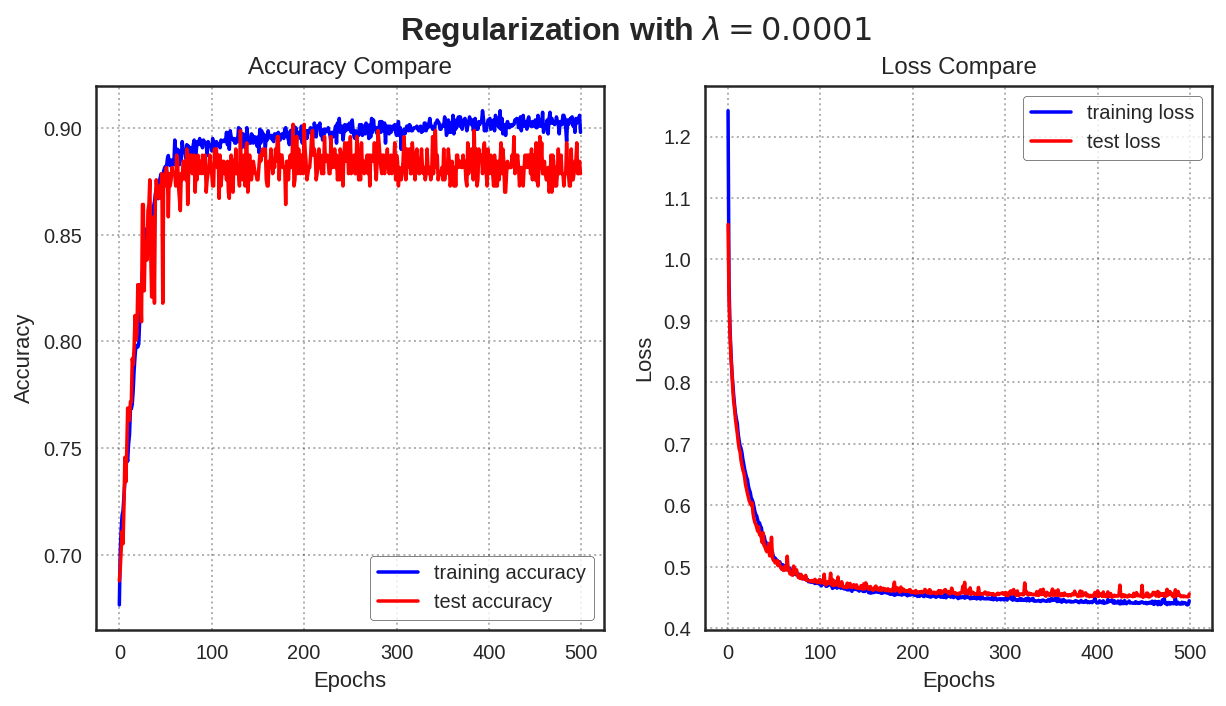

In [106]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.0001$',fontsize=16, fontweight='bold')
plt.show()

In [107]:
model_4_train_score = model_4.evaluate(X_train,y_train,verbose=0)
model_4_score = model_4.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_4_train_score[0])
print("Test loss: ",model_4_score[0])
print("Train accuracy: %.4f%%"% (model_4_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_4_score[1]*100))

Train loss:  0.054848252403429894
Test loss:  0.07401129512945352
Train accuracy: 99.0593%
Test accuracy: 97.9769%


In [108]:
y_pred_class_4 = model_4.predict_classes(X_test,verbose=0)
y_test_class_4= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_4,y_pred_class_4))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       240
          1       0.94      0.97      0.96        79
          2       0.94      0.88      0.91        17
          3       1.00      0.90      0.95        10

avg / total       0.98      0.98      0.98       346



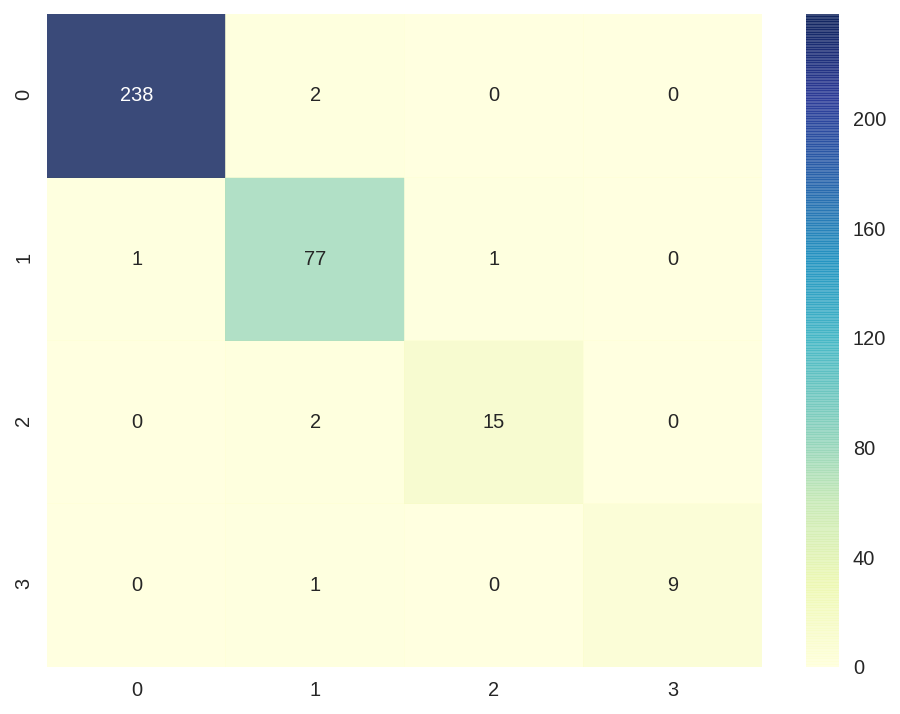

In [109]:
plot_confusion_matrix(model_4, X_test, y_test_class_4)

## 5. Neural Network with L2 Regularization  λ=0.00005

In [0]:
reg_5 = regularizers.l2(l=0.00005)
model_5 = Sequential()
model_5.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=reg_5))
model_5.add(Dense(8, activation='relu',kernel_regularizer=reg_5))
model_5.add(Dense(4, activation='softmax',kernel_regularizer=reg_5))
model_5.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [111]:
model_5.history = model_5.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Train on 1382 samples, validate on 346 samples
Epoch 1/500
1382/1382 [==============================] - 1s 533us/step - loss: 1.2096 - acc: 0.6903 - val_loss: 1.0709 - val_acc: 0.7023
Epoch 2/500
1382/1382 [==============================] - 0s 235us/step - loss: 1.0024 - acc: 0.7026 - val_loss: 0.9509 - val_acc: 0.7023
Epoch 3/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.9067 - acc: 0.7041 - val_loss: 0.8712 - val_acc: 0.7139
Epoch 4/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.8342 - acc: 0.7062 - val_loss: 0.8046 - val_acc: 0.7139
Epoch 5/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.7727 - acc: 0.7098 - val_loss: 0.7426 - val_acc: 0.7283
Epoch 6/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.7063 - acc: 0.7164 - val_loss: 0.6766 - val_acc: 0.7312
Epoch 7/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.6450 - acc: 0.7308 - val_loss: 0.6218 - val_acc: 0

1382/1382 [==============================] - 0s 228us/step - loss: 0.4358 - acc: 0.8285 - val_loss: 0.4168 - val_acc: 0.8266
Epoch 15/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.4126 - acc: 0.8365 - val_loss: 0.4008 - val_acc: 0.8468
Epoch 16/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.3953 - acc: 0.8452 - val_loss: 0.3755 - val_acc: 0.8497
Epoch 17/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.3784 - acc: 0.8546 - val_loss: 0.3614 - val_acc: 0.8497
Epoch 18/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.3624 - acc: 0.8531 - val_loss: 0.3485 - val_acc: 0.8699
Epoch 19/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.3530 - acc: 0.8640 - val_loss: 0.3462 - val_acc: 0.8699
Epoch 20/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.3381 - acc: 0.8669 - val_loss: 0.3285 - val_acc: 0.8728
Epoch 21/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 237us/step - loss: 0.2800 - acc: 0.8944 - val_loss: 0.2722 - val_acc: 0.8873
Epoch 29/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2747 - acc: 0.8900 - val_loss: 0.2683 - val_acc: 0.8902
Epoch 30/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.2694 - acc: 0.8915 - val_loss: 0.2633 - val_acc: 0.8844
Epoch 31/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.2664 - acc: 0.8987 - val_loss: 0.2799 - val_acc: 0.8902
Epoch 32/500
1382/1382 [==============================] - 0s 212us/step - loss: 0.2627 - acc: 0.8944 - val_loss: 0.2682 - val_acc: 0.8786
Epoch 33/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.2609 - acc: 0.8951 - val_loss: 0.2527 - val_acc: 0.8931
Epoch 34/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2557 - acc: 0.9001 - val_loss: 0.2483 - val_acc: 0.8960
Epoch 35/500
1382/1382 [=======================

Epoch 42/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.2342 - acc: 0.9103 - val_loss: 0.2297 - val_acc: 0.9075
Epoch 43/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2316 - acc: 0.9146 - val_loss: 0.2355 - val_acc: 0.9075
Epoch 44/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.2262 - acc: 0.9088 - val_loss: 0.2278 - val_acc: 0.9075
Epoch 45/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2207 - acc: 0.9190 - val_loss: 0.2261 - val_acc: 0.8988
Epoch 46/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.2206 - acc: 0.9139 - val_loss: 0.2231 - val_acc: 0.9075
Epoch 47/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.2169 - acc: 0.9124 - val_loss: 0.2237 - val_acc: 0.9162
Epoch 48/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.2178 - acc: 0.9168 - val_loss: 0.2201 - val_acc: 0.9075
Epoch 49/500
1382/1382 [==========

1382/1382 [==============================] - 0s 235us/step - loss: 0.2080 - acc: 0.9175 - val_loss: 0.2183 - val_acc: 0.9017
Epoch 56/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.2004 - acc: 0.9240 - val_loss: 0.2097 - val_acc: 0.9162
Epoch 57/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.2009 - acc: 0.9219 - val_loss: 0.2104 - val_acc: 0.9017
Epoch 58/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1993 - acc: 0.9197 - val_loss: 0.2089 - val_acc: 0.9133
Epoch 59/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1999 - acc: 0.9226 - val_loss: 0.2128 - val_acc: 0.9133
Epoch 60/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1953 - acc: 0.9276 - val_loss: 0.2036 - val_acc: 0.9104
Epoch 61/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1938 - acc: 0.9262 - val_loss: 0.2136 - val_acc: 0.9075
Epoch 62/500
1382/1382 [=======================

1382/1382 [==============================] - 0s 220us/step - loss: 0.1848 - acc: 0.9334 - val_loss: 0.1927 - val_acc: 0.9249
Epoch 70/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1814 - acc: 0.9370 - val_loss: 0.1922 - val_acc: 0.9249
Epoch 71/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1793 - acc: 0.9342 - val_loss: 0.2331 - val_acc: 0.9104
Epoch 72/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1799 - acc: 0.9327 - val_loss: 0.1928 - val_acc: 0.9277
Epoch 73/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1746 - acc: 0.9378 - val_loss: 0.1923 - val_acc: 0.9364
Epoch 74/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1746 - acc: 0.9342 - val_loss: 0.1882 - val_acc: 0.9249
Epoch 75/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1739 - acc: 0.9363 - val_loss: 0.1968 - val_acc: 0.9335
Epoch 76/500
1382/1382 [=======================

Epoch 83/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1644 - acc: 0.9399 - val_loss: 0.1866 - val_acc: 0.9220
Epoch 84/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.1634 - acc: 0.9378 - val_loss: 0.1818 - val_acc: 0.9335
Epoch 85/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1598 - acc: 0.9378 - val_loss: 0.1910 - val_acc: 0.9393
Epoch 86/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1684 - acc: 0.9363 - val_loss: 0.1833 - val_acc: 0.9422
Epoch 87/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1643 - acc: 0.9414 - val_loss: 0.1842 - val_acc: 0.9364
Epoch 88/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1600 - acc: 0.9428 - val_loss: 0.1837 - val_acc: 0.9393
Epoch 89/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1630 - acc: 0.9399 - val_loss: 0.1793 - val_acc: 0.9277
Epoch 90/500
1382/1382 [==========

1382/1382 [==============================] - 0s 231us/step - loss: 0.1588 - acc: 0.9421 - val_loss: 0.1754 - val_acc: 0.9249
Epoch 97/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1545 - acc: 0.9421 - val_loss: 0.1798 - val_acc: 0.9335
Epoch 98/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1563 - acc: 0.9385 - val_loss: 0.1764 - val_acc: 0.9220
Epoch 99/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1536 - acc: 0.9436 - val_loss: 0.1742 - val_acc: 0.9277
Epoch 100/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1528 - acc: 0.9436 - val_loss: 0.1756 - val_acc: 0.9364
Epoch 101/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1549 - acc: 0.9457 - val_loss: 0.1742 - val_acc: 0.9249
Epoch 102/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1515 - acc: 0.9457 - val_loss: 0.1763 - val_acc: 0.9335
Epoch 103/500
1382/1382 [===================

1382/1382 [==============================] - 0s 221us/step - loss: 0.1460 - acc: 0.9465 - val_loss: 0.1711 - val_acc: 0.9306
Epoch 111/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1451 - acc: 0.9465 - val_loss: 0.1724 - val_acc: 0.9393
Epoch 112/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1456 - acc: 0.9436 - val_loss: 0.1696 - val_acc: 0.9277
Epoch 113/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1469 - acc: 0.9443 - val_loss: 0.1706 - val_acc: 0.9277
Epoch 114/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1486 - acc: 0.9407 - val_loss: 0.1721 - val_acc: 0.9277
Epoch 115/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1483 - acc: 0.9385 - val_loss: 0.1734 - val_acc: 0.9277
Epoch 116/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.1455 - acc: 0.9421 - val_loss: 0.1735 - val_acc: 0.9335
Epoch 117/500
1382/1382 [================

1382/1382 [==============================] - 0s 237us/step - loss: 0.1448 - acc: 0.9493 - val_loss: 0.1644 - val_acc: 0.9306
Epoch 125/500
1382/1382 [==============================] - 0s 220us/step - loss: 0.1407 - acc: 0.9450 - val_loss: 0.1676 - val_acc: 0.9220
Epoch 126/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1369 - acc: 0.9465 - val_loss: 0.1745 - val_acc: 0.9364
Epoch 127/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1408 - acc: 0.9472 - val_loss: 0.1678 - val_acc: 0.9335
Epoch 128/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1477 - acc: 0.9392 - val_loss: 0.1639 - val_acc: 0.9422
Epoch 129/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1356 - acc: 0.9508 - val_loss: 0.1628 - val_acc: 0.9277
Epoch 130/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1420 - acc: 0.9450 - val_loss: 0.1625 - val_acc: 0.9422
Epoch 131/500
1382/1382 [================

Epoch 138/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1360 - acc: 0.9530 - val_loss: 0.1589 - val_acc: 0.9364
Epoch 139/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1342 - acc: 0.9486 - val_loss: 0.1576 - val_acc: 0.9364
Epoch 140/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1339 - acc: 0.9486 - val_loss: 0.1633 - val_acc: 0.9422
Epoch 141/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1348 - acc: 0.9479 - val_loss: 0.1585 - val_acc: 0.9335
Epoch 142/500
1382/1382 [==============================] - 0s 222us/step - loss: 0.1317 - acc: 0.9522 - val_loss: 0.1595 - val_acc: 0.9277
Epoch 143/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1309 - acc: 0.9493 - val_loss: 0.1635 - val_acc: 0.9422
Epoch 144/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1357 - acc: 0.9530 - val_loss: 0.1567 - val_acc: 0.9364
Epoch 145/500
1382/1382 [==

1382/1382 [==============================] - 0s 229us/step - loss: 0.1286 - acc: 0.9522 - val_loss: 0.1569 - val_acc: 0.9422
Epoch 152/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1301 - acc: 0.9515 - val_loss: 0.1629 - val_acc: 0.9393
Epoch 153/500
1382/1382 [==============================] - 0s 218us/step - loss: 0.1295 - acc: 0.9530 - val_loss: 0.1548 - val_acc: 0.9451
Epoch 154/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1266 - acc: 0.9544 - val_loss: 0.1564 - val_acc: 0.9422
Epoch 155/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1326 - acc: 0.9493 - val_loss: 0.1586 - val_acc: 0.9422
Epoch 156/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.1292 - acc: 0.9508 - val_loss: 0.1514 - val_acc: 0.9451
Epoch 157/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1271 - acc: 0.9530 - val_loss: 0.1597 - val_acc: 0.9393
Epoch 158/500
1382/1382 [================

1382/1382 [==============================] - 0s 235us/step - loss: 0.1263 - acc: 0.9537 - val_loss: 0.1512 - val_acc: 0.9422
Epoch 166/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1264 - acc: 0.9530 - val_loss: 0.1603 - val_acc: 0.9422
Epoch 167/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1253 - acc: 0.9522 - val_loss: 0.1497 - val_acc: 0.9451
Epoch 168/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1241 - acc: 0.9544 - val_loss: 0.1563 - val_acc: 0.9422
Epoch 169/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1230 - acc: 0.9530 - val_loss: 0.1547 - val_acc: 0.9422
Epoch 170/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.1243 - acc: 0.9522 - val_loss: 0.1505 - val_acc: 0.9451
Epoch 171/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1265 - acc: 0.9537 - val_loss: 0.1540 - val_acc: 0.9451
Epoch 172/500
1382/1382 [================

1382/1382 [==============================] - 0s 231us/step - loss: 0.1228 - acc: 0.9559 - val_loss: 0.1459 - val_acc: 0.9451
Epoch 180/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1261 - acc: 0.9544 - val_loss: 0.1462 - val_acc: 0.9538
Epoch 181/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1191 - acc: 0.9566 - val_loss: 0.1448 - val_acc: 0.9509
Epoch 182/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1205 - acc: 0.9537 - val_loss: 0.1511 - val_acc: 0.9451
Epoch 183/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1187 - acc: 0.9551 - val_loss: 0.1490 - val_acc: 0.9364
Epoch 184/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1267 - acc: 0.9501 - val_loss: 0.1511 - val_acc: 0.9422
Epoch 185/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1209 - acc: 0.9508 - val_loss: 0.1482 - val_acc: 0.9480
Epoch 186/500
1382/1382 [================

1382/1382 [==============================] - 0s 226us/step - loss: 0.1180 - acc: 0.9559 - val_loss: 0.1451 - val_acc: 0.9509
Epoch 194/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1169 - acc: 0.9559 - val_loss: 0.1521 - val_acc: 0.9364
Epoch 195/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1166 - acc: 0.9566 - val_loss: 0.1489 - val_acc: 0.9451
Epoch 196/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1236 - acc: 0.9551 - val_loss: 0.1498 - val_acc: 0.9422
Epoch 197/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.1151 - acc: 0.9588 - val_loss: 0.1458 - val_acc: 0.9451
Epoch 198/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1166 - acc: 0.9580 - val_loss: 0.1502 - val_acc: 0.9422
Epoch 199/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1167 - acc: 0.9566 - val_loss: 0.1433 - val_acc: 0.9509
Epoch 200/500
1382/1382 [================

Epoch 207/500
1382/1382 [==============================] - 0s 219us/step - loss: 0.1144 - acc: 0.9566 - val_loss: 0.1407 - val_acc: 0.9480
Epoch 208/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.1173 - acc: 0.9559 - val_loss: 0.1466 - val_acc: 0.9393
Epoch 209/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.1156 - acc: 0.9580 - val_loss: 0.1475 - val_acc: 0.9480
Epoch 210/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.1132 - acc: 0.9588 - val_loss: 0.1462 - val_acc: 0.9538
Epoch 211/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1124 - acc: 0.9595 - val_loss: 0.1424 - val_acc: 0.9538
Epoch 212/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1190 - acc: 0.9566 - val_loss: 0.1427 - val_acc: 0.9538
Epoch 213/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.1140 - acc: 0.9573 - val_loss: 0.1434 - val_acc: 0.9538
Epoch 214/500
1382/1382 [==

1382/1382 [==============================] - 0s 237us/step - loss: 0.1127 - acc: 0.9588 - val_loss: 0.1377 - val_acc: 0.9480
Epoch 221/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1083 - acc: 0.9624 - val_loss: 0.1441 - val_acc: 0.9422
Epoch 222/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1110 - acc: 0.9566 - val_loss: 0.1381 - val_acc: 0.9538
Epoch 223/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.1093 - acc: 0.9588 - val_loss: 0.1426 - val_acc: 0.9451
Epoch 224/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1128 - acc: 0.9566 - val_loss: 0.1360 - val_acc: 0.9509
Epoch 225/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1115 - acc: 0.9573 - val_loss: 0.1362 - val_acc: 0.9538
Epoch 226/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1104 - acc: 0.9537 - val_loss: 0.1373 - val_acc: 0.9509
Epoch 227/500
1382/1382 [================

Epoch 234/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1091 - acc: 0.9595 - val_loss: 0.1438 - val_acc: 0.9480
Epoch 235/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.1066 - acc: 0.9602 - val_loss: 0.1350 - val_acc: 0.9538
Epoch 236/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1061 - acc: 0.9624 - val_loss: 0.1433 - val_acc: 0.9480
Epoch 237/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1072 - acc: 0.9602 - val_loss: 0.1414 - val_acc: 0.9480
Epoch 238/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.1099 - acc: 0.9595 - val_loss: 0.1404 - val_acc: 0.9538
Epoch 239/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.1079 - acc: 0.9595 - val_loss: 0.1391 - val_acc: 0.9538
Epoch 240/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1075 - acc: 0.9580 - val_loss: 0.1353 - val_acc: 0.9538
Epoch 241/500
1382/1382 [==

Epoch 248/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1053 - acc: 0.9616 - val_loss: 0.1388 - val_acc: 0.9595
Epoch 249/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1039 - acc: 0.9631 - val_loss: 0.1337 - val_acc: 0.9538
Epoch 250/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1038 - acc: 0.9616 - val_loss: 0.1403 - val_acc: 0.9538
Epoch 251/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.1074 - acc: 0.9573 - val_loss: 0.1412 - val_acc: 0.9538
Epoch 252/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1035 - acc: 0.9624 - val_loss: 0.1375 - val_acc: 0.9509
Epoch 253/500
1382/1382 [==============================] - 0s 247us/step - loss: 0.1064 - acc: 0.9602 - val_loss: 0.1331 - val_acc: 0.9451
Epoch 254/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.1019 - acc: 0.9653 - val_loss: 0.1319 - val_acc: 0.9480
Epoch 255/500
1382/1382 [==

Epoch 262/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.1018 - acc: 0.9638 - val_loss: 0.1313 - val_acc: 0.9509
Epoch 263/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.1015 - acc: 0.9624 - val_loss: 0.1449 - val_acc: 0.9509
Epoch 264/500
1382/1382 [==============================] - 0s 244us/step - loss: 0.1021 - acc: 0.9638 - val_loss: 0.1300 - val_acc: 0.9480
Epoch 265/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0979 - acc: 0.9631 - val_loss: 0.1354 - val_acc: 0.9566
Epoch 266/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.1007 - acc: 0.9653 - val_loss: 0.1317 - val_acc: 0.9480
Epoch 267/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0996 - acc: 0.9645 - val_loss: 0.1376 - val_acc: 0.9509
Epoch 268/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.1006 - acc: 0.9624 - val_loss: 0.1374 - val_acc: 0.9566
Epoch 269/500
1382/1382 [==

1382/1382 [==============================] - 0s 231us/step - loss: 0.1045 - acc: 0.9566 - val_loss: 0.1332 - val_acc: 0.9451
Epoch 276/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.1002 - acc: 0.9580 - val_loss: 0.1291 - val_acc: 0.9480
Epoch 277/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0988 - acc: 0.9638 - val_loss: 0.1296 - val_acc: 0.9566
Epoch 278/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0970 - acc: 0.9667 - val_loss: 0.1312 - val_acc: 0.9509
Epoch 279/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0958 - acc: 0.9645 - val_loss: 0.1477 - val_acc: 0.9509
Epoch 280/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.1014 - acc: 0.9645 - val_loss: 0.1339 - val_acc: 0.9480
Epoch 281/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.1016 - acc: 0.9660 - val_loss: 0.1344 - val_acc: 0.9624
Epoch 282/500
1382/1382 [================

1382/1382 [==============================] - 0s 226us/step - loss: 0.0960 - acc: 0.9653 - val_loss: 0.1357 - val_acc: 0.9566
Epoch 290/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0986 - acc: 0.9624 - val_loss: 0.1405 - val_acc: 0.9538
Epoch 291/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.1029 - acc: 0.9602 - val_loss: 0.1289 - val_acc: 0.9509
Epoch 292/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0969 - acc: 0.9660 - val_loss: 0.1279 - val_acc: 0.9566
Epoch 293/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0973 - acc: 0.9602 - val_loss: 0.1295 - val_acc: 0.9566
Epoch 294/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0999 - acc: 0.9653 - val_loss: 0.1295 - val_acc: 0.9595
Epoch 295/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0968 - acc: 0.9638 - val_loss: 0.1293 - val_acc: 0.9566
Epoch 296/500
1382/1382 [================

1382/1382 [==============================] - 0s 236us/step - loss: 0.0947 - acc: 0.9631 - val_loss: 0.1273 - val_acc: 0.9595
Epoch 304/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0930 - acc: 0.9682 - val_loss: 0.1270 - val_acc: 0.9480
Epoch 305/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0931 - acc: 0.9674 - val_loss: 0.1250 - val_acc: 0.9451
Epoch 306/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0944 - acc: 0.9645 - val_loss: 0.1324 - val_acc: 0.9538
Epoch 307/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0966 - acc: 0.9653 - val_loss: 0.1341 - val_acc: 0.9538
Epoch 308/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0932 - acc: 0.9689 - val_loss: 0.1284 - val_acc: 0.9480
Epoch 309/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0948 - acc: 0.9653 - val_loss: 0.1318 - val_acc: 0.9480
Epoch 310/500
1382/1382 [================

1382/1382 [==============================] - 0s 228us/step - loss: 0.0961 - acc: 0.9667 - val_loss: 0.1373 - val_acc: 0.9480
Epoch 317/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0917 - acc: 0.9674 - val_loss: 0.1247 - val_acc: 0.9509
Epoch 318/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0915 - acc: 0.9689 - val_loss: 0.1261 - val_acc: 0.9566
Epoch 319/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0935 - acc: 0.9696 - val_loss: 0.1406 - val_acc: 0.9480
Epoch 320/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0912 - acc: 0.9682 - val_loss: 0.1231 - val_acc: 0.9480
Epoch 321/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0916 - acc: 0.9682 - val_loss: 0.1246 - val_acc: 0.9538
Epoch 322/500
1382/1382 [==============================] - 0s 221us/step - loss: 0.0911 - acc: 0.9667 - val_loss: 0.1257 - val_acc: 0.9480
Epoch 323/500
1382/1382 [================

1382/1382 [==============================] - 0s 231us/step - loss: 0.0924 - acc: 0.9682 - val_loss: 0.1314 - val_acc: 0.9595
Epoch 330/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0943 - acc: 0.9689 - val_loss: 0.1405 - val_acc: 0.9480
Epoch 331/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0915 - acc: 0.9660 - val_loss: 0.1250 - val_acc: 0.9480
Epoch 332/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0891 - acc: 0.9711 - val_loss: 0.1222 - val_acc: 0.9509
Epoch 333/500
1382/1382 [==============================] - 0s 213us/step - loss: 0.0916 - acc: 0.9660 - val_loss: 0.1237 - val_acc: 0.9566
Epoch 334/500
1382/1382 [==============================] - 0s 224us/step - loss: 0.0878 - acc: 0.9674 - val_loss: 0.1307 - val_acc: 0.9566
Epoch 335/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0881 - acc: 0.9689 - val_loss: 0.1294 - val_acc: 0.9538
Epoch 336/500
1382/1382 [================

1382/1382 [==============================] - 0s 232us/step - loss: 0.0899 - acc: 0.9674 - val_loss: 0.1218 - val_acc: 0.9566
Epoch 344/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0869 - acc: 0.9703 - val_loss: 0.1272 - val_acc: 0.9595
Epoch 345/500
1382/1382 [==============================] - 0s 225us/step - loss: 0.0912 - acc: 0.9711 - val_loss: 0.1225 - val_acc: 0.9509
Epoch 346/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0918 - acc: 0.9674 - val_loss: 0.1517 - val_acc: 0.9480
Epoch 347/500
1382/1382 [==============================] - 0s 246us/step - loss: 0.0927 - acc: 0.9645 - val_loss: 0.1217 - val_acc: 0.9538
Epoch 348/500
1382/1382 [==============================] - 0s 239us/step - loss: 0.0892 - acc: 0.9674 - val_loss: 0.1283 - val_acc: 0.9566
Epoch 349/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0910 - acc: 0.9696 - val_loss: 0.1246 - val_acc: 0.9480
Epoch 350/500
1382/1382 [================

Epoch 357/500
1382/1382 [==============================] - 0s 245us/step - loss: 0.0868 - acc: 0.9732 - val_loss: 0.1210 - val_acc: 0.9538
Epoch 358/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0859 - acc: 0.9703 - val_loss: 0.1259 - val_acc: 0.9509
Epoch 359/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0881 - acc: 0.9747 - val_loss: 0.1246 - val_acc: 0.9566
Epoch 360/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0870 - acc: 0.9667 - val_loss: 0.1357 - val_acc: 0.9566
Epoch 361/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0844 - acc: 0.9703 - val_loss: 0.1254 - val_acc: 0.9480
Epoch 362/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0882 - acc: 0.9703 - val_loss: 0.1187 - val_acc: 0.9595
Epoch 363/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0873 - acc: 0.9711 - val_loss: 0.1315 - val_acc: 0.9480
Epoch 364/500
1382/1382 [==

Epoch 371/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0866 - acc: 0.9703 - val_loss: 0.1198 - val_acc: 0.9595
Epoch 372/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0879 - acc: 0.9674 - val_loss: 0.1159 - val_acc: 0.9595
Epoch 373/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0832 - acc: 0.9696 - val_loss: 0.1298 - val_acc: 0.9538
Epoch 374/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0914 - acc: 0.9703 - val_loss: 0.1261 - val_acc: 0.9538
Epoch 375/500
1382/1382 [==============================] - 0s 243us/step - loss: 0.0853 - acc: 0.9682 - val_loss: 0.1153 - val_acc: 0.9595
Epoch 376/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0854 - acc: 0.9725 - val_loss: 0.1266 - val_acc: 0.9538
Epoch 377/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0841 - acc: 0.9747 - val_loss: 0.1171 - val_acc: 0.9538
Epoch 378/500
1382/1382 [==

1382/1382 [==============================] - 0s 232us/step - loss: 0.0826 - acc: 0.9725 - val_loss: 0.1158 - val_acc: 0.9538
Epoch 385/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0841 - acc: 0.9747 - val_loss: 0.1186 - val_acc: 0.9538
Epoch 386/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0855 - acc: 0.9740 - val_loss: 0.1144 - val_acc: 0.9624
Epoch 387/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0836 - acc: 0.9747 - val_loss: 0.1170 - val_acc: 0.9624
Epoch 388/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0827 - acc: 0.9754 - val_loss: 0.1276 - val_acc: 0.9538
Epoch 389/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0817 - acc: 0.9718 - val_loss: 0.1165 - val_acc: 0.9509
Epoch 390/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0822 - acc: 0.9740 - val_loss: 0.1232 - val_acc: 0.9566
Epoch 391/500
1382/1382 [================

1382/1382 [==============================] - 0s 243us/step - loss: 0.0831 - acc: 0.9711 - val_loss: 0.1157 - val_acc: 0.9595
Epoch 398/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0797 - acc: 0.9754 - val_loss: 0.1141 - val_acc: 0.9653
Epoch 399/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0829 - acc: 0.9732 - val_loss: 0.1174 - val_acc: 0.9595
Epoch 400/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0796 - acc: 0.9747 - val_loss: 0.1336 - val_acc: 0.9566
Epoch 401/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0825 - acc: 0.9754 - val_loss: 0.1200 - val_acc: 0.9538
Epoch 402/500
1382/1382 [==============================] - 0s 216us/step - loss: 0.0847 - acc: 0.9718 - val_loss: 0.1169 - val_acc: 0.9538
Epoch 403/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0805 - acc: 0.9754 - val_loss: 0.1176 - val_acc: 0.9624
Epoch 404/500
1382/1382 [================

1382/1382 [==============================] - 0s 232us/step - loss: 0.0816 - acc: 0.9740 - val_loss: 0.1138 - val_acc: 0.9653
Epoch 412/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0814 - acc: 0.9703 - val_loss: 0.1216 - val_acc: 0.9566
Epoch 413/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0866 - acc: 0.9689 - val_loss: 0.1255 - val_acc: 0.9538
Epoch 414/500
1382/1382 [==============================] - 0s 223us/step - loss: 0.0802 - acc: 0.9747 - val_loss: 0.1241 - val_acc: 0.9566
Epoch 415/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0806 - acc: 0.9776 - val_loss: 0.1163 - val_acc: 0.9595
Epoch 416/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0785 - acc: 0.9732 - val_loss: 0.1147 - val_acc: 0.9595
Epoch 417/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0781 - acc: 0.9761 - val_loss: 0.1147 - val_acc: 0.9566
Epoch 418/500
1382/1382 [================

1382/1382 [==============================] - 0s 243us/step - loss: 0.0787 - acc: 0.9790 - val_loss: 0.1109 - val_acc: 0.9595
Epoch 425/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0774 - acc: 0.9754 - val_loss: 0.1114 - val_acc: 0.9624
Epoch 426/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0780 - acc: 0.9732 - val_loss: 0.1217 - val_acc: 0.9624
Epoch 427/500
1382/1382 [==============================] - 0s 248us/step - loss: 0.0778 - acc: 0.9776 - val_loss: 0.1220 - val_acc: 0.9595
Epoch 428/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0789 - acc: 0.9768 - val_loss: 0.1148 - val_acc: 0.9538
Epoch 429/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0777 - acc: 0.9740 - val_loss: 0.1120 - val_acc: 0.9595
Epoch 430/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0816 - acc: 0.9732 - val_loss: 0.1120 - val_acc: 0.9624
Epoch 431/500
1382/1382 [================

1382/1382 [==============================] - 0s 234us/step - loss: 0.0839 - acc: 0.9696 - val_loss: 0.1170 - val_acc: 0.9509
Epoch 439/500
1382/1382 [==============================] - 0s 238us/step - loss: 0.0762 - acc: 0.9754 - val_loss: 0.1179 - val_acc: 0.9711
Epoch 440/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0762 - acc: 0.9754 - val_loss: 0.1134 - val_acc: 0.9624
Epoch 441/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0763 - acc: 0.9761 - val_loss: 0.1099 - val_acc: 0.9653
Epoch 442/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0749 - acc: 0.9776 - val_loss: 0.1184 - val_acc: 0.9538
Epoch 443/500
1382/1382 [==============================] - 0s 241us/step - loss: 0.0772 - acc: 0.9776 - val_loss: 0.1132 - val_acc: 0.9624
Epoch 444/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0766 - acc: 0.9718 - val_loss: 0.1108 - val_acc: 0.9595
Epoch 445/500
1382/1382 [================

1382/1382 [==============================] - 0s 229us/step - loss: 0.0730 - acc: 0.9776 - val_loss: 0.1105 - val_acc: 0.9624
Epoch 453/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0838 - acc: 0.9732 - val_loss: 0.1075 - val_acc: 0.9595
Epoch 454/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0739 - acc: 0.9776 - val_loss: 0.1153 - val_acc: 0.9595
Epoch 455/500
1382/1382 [==============================] - 0s 226us/step - loss: 0.0782 - acc: 0.9740 - val_loss: 0.1075 - val_acc: 0.9653
Epoch 456/500
1382/1382 [==============================] - 0s 240us/step - loss: 0.0752 - acc: 0.9754 - val_loss: 0.1114 - val_acc: 0.9624
Epoch 457/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0739 - acc: 0.9761 - val_loss: 0.1092 - val_acc: 0.9653
Epoch 458/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0739 - acc: 0.9783 - val_loss: 0.1127 - val_acc: 0.9624
Epoch 459/500
1382/1382 [================

Epoch 466/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0720 - acc: 0.9790 - val_loss: 0.1101 - val_acc: 0.9682
Epoch 467/500
1382/1382 [==============================] - 0s 227us/step - loss: 0.0717 - acc: 0.9790 - val_loss: 0.1169 - val_acc: 0.9566
Epoch 468/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0760 - acc: 0.9754 - val_loss: 0.1164 - val_acc: 0.9624
Epoch 469/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0782 - acc: 0.9754 - val_loss: 0.1065 - val_acc: 0.9682
Epoch 470/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0741 - acc: 0.9797 - val_loss: 0.1168 - val_acc: 0.9595
Epoch 471/500
1382/1382 [==============================] - 0s 242us/step - loss: 0.0723 - acc: 0.9797 - val_loss: 0.1079 - val_acc: 0.9653
Epoch 472/500
1382/1382 [==============================] - 0s 228us/step - loss: 0.0711 - acc: 0.9790 - val_loss: 0.1085 - val_acc: 0.9653
Epoch 473/500
1382/1382 [==

1382/1382 [==============================] - 0s 241us/step - loss: 0.0702 - acc: 0.9797 - val_loss: 0.1044 - val_acc: 0.9624
Epoch 480/500
1382/1382 [==============================] - 0s 229us/step - loss: 0.0702 - acc: 0.9768 - val_loss: 0.1176 - val_acc: 0.9595
Epoch 481/500
1382/1382 [==============================] - 0s 231us/step - loss: 0.0717 - acc: 0.9805 - val_loss: 0.1407 - val_acc: 0.9595
Epoch 482/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0717 - acc: 0.9768 - val_loss: 0.1055 - val_acc: 0.9624
Epoch 483/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0722 - acc: 0.9761 - val_loss: 0.1098 - val_acc: 0.9653
Epoch 484/500
1382/1382 [==============================] - 0s 236us/step - loss: 0.0700 - acc: 0.9790 - val_loss: 0.1144 - val_acc: 0.9711
Epoch 485/500
1382/1382 [==============================] - 0s 232us/step - loss: 0.0718 - acc: 0.9812 - val_loss: 0.1113 - val_acc: 0.9624
Epoch 486/500
1382/1382 [================

1382/1382 [==============================] - 0s 235us/step - loss: 0.0702 - acc: 0.9797 - val_loss: 0.1100 - val_acc: 0.9595
Epoch 494/500
1382/1382 [==============================] - 0s 230us/step - loss: 0.0771 - acc: 0.9790 - val_loss: 0.1090 - val_acc: 0.9624
Epoch 495/500
1382/1382 [==============================] - 0s 235us/step - loss: 0.0683 - acc: 0.9797 - val_loss: 0.1051 - val_acc: 0.9653
Epoch 496/500
1382/1382 [==============================] - 0s 234us/step - loss: 0.0688 - acc: 0.9805 - val_loss: 0.1087 - val_acc: 0.9682
Epoch 497/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0694 - acc: 0.9819 - val_loss: 0.1087 - val_acc: 0.9624
Epoch 498/500
1382/1382 [==============================] - 0s 237us/step - loss: 0.0702 - acc: 0.9768 - val_loss: 0.1051 - val_acc: 0.9682
Epoch 499/500
1382/1382 [==============================] - 0s 233us/step - loss: 0.0696 - acc: 0.9805 - val_loss: 0.1038 - val_acc: 0.9624
Epoch 500/500
1382/1382 [================

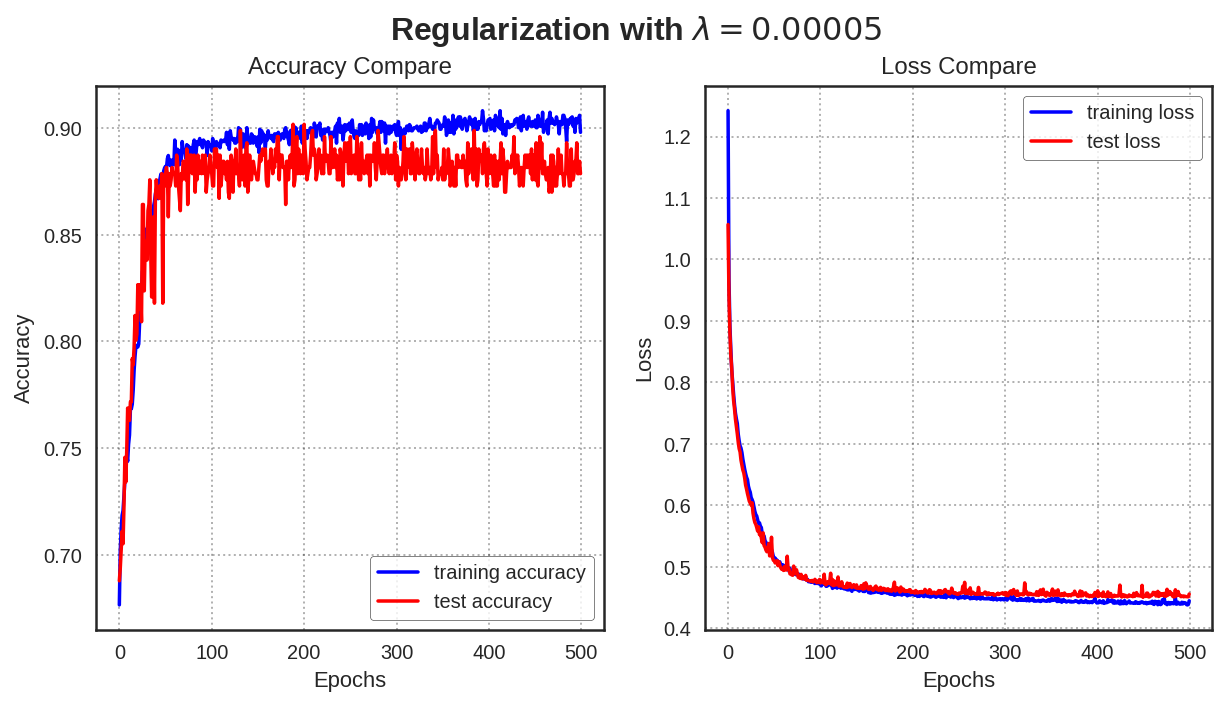

In [129]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(model_2.history.history['acc'],color='b',label='training accuracy')
ax1.plot(model_2.history.history['val_acc'],color='r',label='test accuracy')
ax1.set_title('Accuracy Compare')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

ax2.plot(model_2.history.history['loss'],color='b',label='training loss')
ax2.plot(model_2.history.history['val_loss'],color='r',label='test loss')
ax2.set_title('Loss Compare')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)

fig.suptitle('Regularization with $\lambda=0.00005$',fontsize=16, fontweight='bold')
plt.show()

In [130]:
model_5_train_score = model_5.evaluate(X_train,y_train,verbose=0)
model_5_score = model_5.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_5_train_score[0])
print("Test loss: ",model_5_score[0])
print("Train accuracy: %.4f%%"% (model_5_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_5_score[1]*100))

Train loss:  0.0651546886107209
Test loss:  0.1072923845982965
Train accuracy: 98.2634%
Test accuracy: 96.2428%


In [131]:
y_pred_class_5 = model_5.predict_classes(X_test,verbose=0)
y_test_class_5= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_5,y_pred_class_5))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       240
          1       0.89      0.95      0.92        79
          2       0.94      1.00      0.97        17
          3       0.90      0.90      0.90        10

avg / total       0.96      0.96      0.96       346



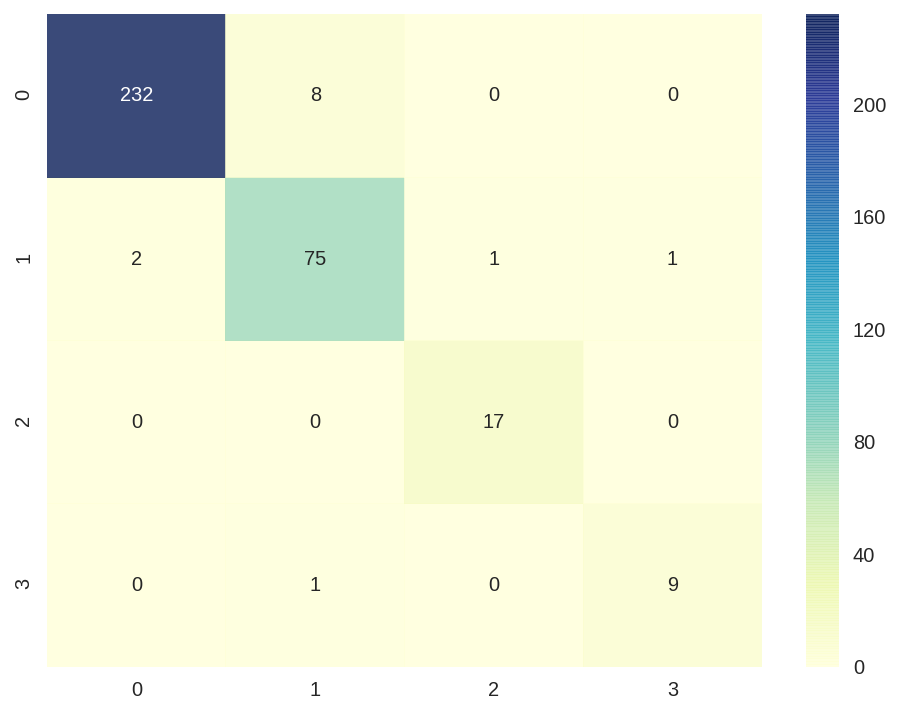

In [132]:
plot_confusion_matrix(model_5, X_test, y_test_class_5)

## 6. Summary

In [133]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
Total params: 524
Trainable params: 524
Non-trainable params: 0
_________________________________________________________________


In [0]:
index = {'Train loss':pd.Series([0.0696,0.4389,0.1380, 0.05484,0.0651], index=['x=0','x=0.01','x=0.001','x=0.0001','x=0.00005']),
        'Test loss':pd.Series([0.1253,0.4554,0.1769,0.0740,0.1072], index=['x=0','x=0.01','x=0.001','x=0.0001','x=0.00005']),
        'Train accuracy':pd.Series(['97.3227%','90.3039%','98.3357%','99.0593%','98.2634%'], index=['x=0','x=0.01','x=0.001','x=0.0001','x=0.00005']),
        'Test accuracy':pd.Series(['95.6647%','87.8613%','96.8208%','97.9769%','96.2428%'], index=['x=0','x=0.01','x=0.001','x=0.0001','x=0.00005'])}

Train loss:  0.06962386089041506
Test loss:  0.12532311081455622
Train accuracy: 97.3227%
Test accuracy: 95.6647%
  
  
Train loss:  0.43896796747330474
Test loss:  0.45546428213229756
Train accuracy: 90.3039%
Test accuracy: 87.8613%
  
Train loss:  0.13804458698470753
Test loss:  0.17697299388102714
Train accuracy: 98.3357%
Test accuracy: 96.8208%
  
Train loss:  0.054848252403429894
Test loss:  0.07401129512945352
Train accuracy: 99.0593%
Test accuracy: 97.9769%
  
Train loss:  0.0651546886107209
Test loss:  0.1072923845982965
Train accuracy: 98.2634%
Test accuracy: 96.2428%

In [146]:
df = pd.DataFrame(index)
df

,Test accuracy,Test loss,Train accuracy,Train loss
x=0,95.6647%,0.1253,97.3227%,0.06960
x=0.01,87.8613%,0.4554,90.3039%,0.43890
x=0.001,96.8208%,0.1769,98.3357%,0.13800
x=0.0001,97.9769%,0.0740,99.0593%,0.05484
x=0.00005,96.2428%,0.1072,98.2634%,0.06510


## 5. Plot the results


In [0]:
colors = sns.color_palette("husl", 8)

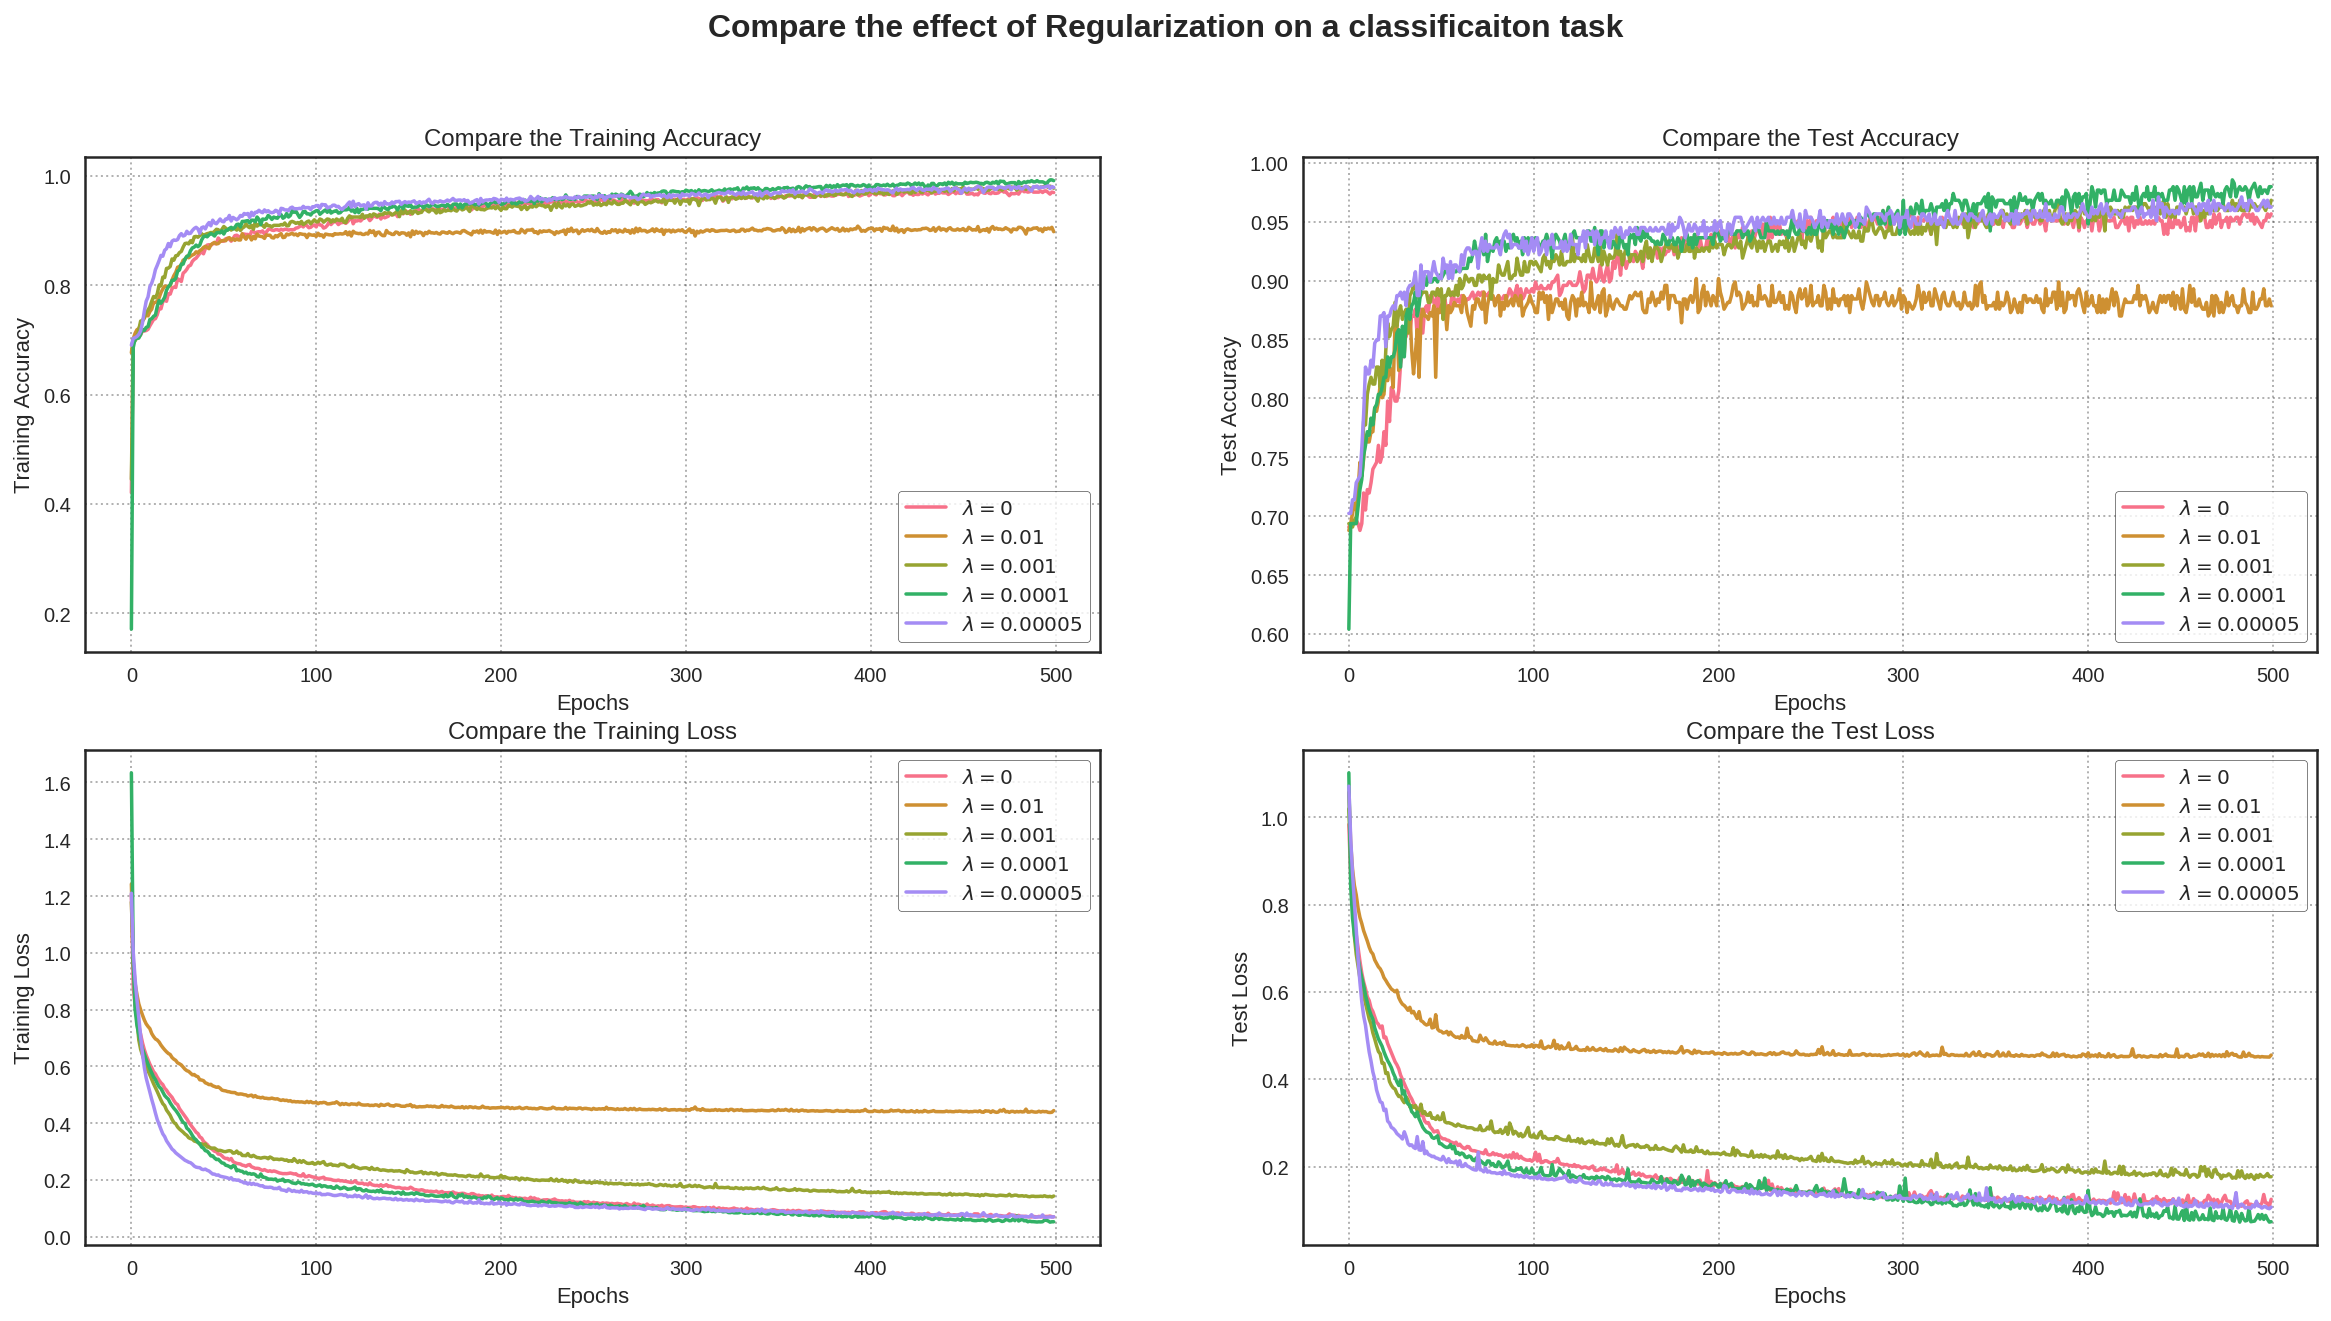

In [122]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1.history.history['acc'],color=colors[0],label='$\lambda=0$')
ax1.plot(model_2.history.history['acc'],color=colors[1],label='$\lambda=0.01$')
ax1.plot(model_3.history.history['acc'],color=colors[2],label='$\lambda=0.001$')
ax1.plot(model_4.history.history['acc'],color=colors[3],label='$\lambda=0.0001$')
ax1.plot(model_5.history.history['acc'],color=colors[6],label='$\lambda=0.00005$')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1.history.history['val_acc'],color=colors[0],label='$\lambda=0$')
ax2.plot(model_2.history.history['val_acc'],color=colors[1],label='$\lambda=0.01$')
ax2.plot(model_3.history.history['val_acc'],color=colors[2],label='$\lambda=0.001$')
ax2.plot(model_4.history.history['val_acc'],color=colors[3],label='$\lambda=0.0001$')
ax2.plot(model_5.history.history['val_acc'],color=colors[6],label='$\lambda=0.00005$')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1.history.history['loss'],color=colors[0],label='$\lambda=0$')
ax3.plot(model_2.history.history['loss'],color=colors[1],label='$\lambda=0.01$')
ax3.plot(model_3.history.history['loss'],color=colors[2],label='$\lambda=0.001$')
ax3.plot(model_4.history.history['loss'],color=colors[3],label='$\lambda=0.0001$')
ax3.plot(model_5.history.history['loss'],color=colors[6],label='$\lambda=0.00005$')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')


ax4.plot(model_1.history.history['val_loss'],color=colors[0],label='$\lambda=0$')
ax4.plot(model_2.history.history['val_loss'],color=colors[1],label='$\lambda=0.01$')
ax4.plot(model_3.history.history['val_loss'],color=colors[2],label='$\lambda=0.001$')
ax4.plot(model_4.history.history['val_loss'],color=colors[3],label='$\lambda=0.0001$')
ax4.plot(model_5.history.history['val_loss'],color=colors[6],label='$\lambda=0.00005$')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the effect of Regularization on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()